___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to "***Fraud Detection Project***". This is the last project of the Capstone Series.

One of the challenges in this project is the absence of domain knowledge. So without knowing what the column names are, you will only be interested in their values. The other one is the class frequencies of the target variable are quite imbalanced.

You will implement ***Logistic Regression, Random Forest, XGBoost,and Neural Network*** algorithms and ***Unbalanced Data Techniques*** . Also visualize performances of the models using ***Seaborn, Matplotlib*** and ***other libraries*** in a variety of ways.

Data drift and model drirft are key consepts about ML and MLOPS, you can monitor and check your data and models with plenty of ways and tools. ***Deepchecks*** is one of them and the leading tool for testing and for validating your machine learning models and data, and it enables doing so with minimal effort. In this project, you will apply ***Data Integrity, Train-Test Validation, and Model Evaluation*** checks.
Deepchecks Introduction : https://youtu.be/7ELdizoi6BU

At the end of the project, you will have the opportunity to deploy your model by ***Streamlit API***.

Before diving into the project, please take a look at the Determines and Tasks.

---
---


# #Determines
The datasets contains transactions made by credit cards in September 2013 by european cardholders. This dataset presents transactions that occurred in two days, where it has **492 frauds** out of **284,807** transactions. The dataset is **highly unbalanced**, the positive class (frauds) account for 0.172% of all transactions.

**Feature Information:**

**Time**: This feature is contains the seconds elapsed between each transaction and the first transaction in the dataset. 

**Amount**:  This feature is the transaction Amount, can be used for example-dependant cost-senstive learning. 

**Class**: This feature is the target variable and it takes value 1 in case of fraud and 0 otherwise.

---

The aim of this project is to predict whether a credit card transaction is fraudulent. Of course, this is not easy to do.
First of all, you need to analyze and recognize your data well in order to draw your roadmap and choose the correct arguments you will use. Accordingly, you can examine the frequency distributions of variables. You can observe variable correlations and want to explore multicollinearity. You can display the distribution of the target variable's classes over other variables. 
Also, it is useful to take missing values and outliers.

After these procedures, you can move on to the model building stage by doing the basic data pre-processing you are familiar with. 

Start with Logistic Regression and evaluate model performance. You will apply the Unbalanced Data Techniques used to increase the performance. Next, observe their effects.

Then, you will use four different algorithms in the model building phase. 

In the final step, you will deploy your model using ***Streamlit API***. 

---
---


# #Tasks

#### 1. Exploratory Data Analysis & Data Cleaning

- Import Modules, Load Data & Data Review
- Apply data integrity checks
- Exploratory Data Analysis
- Data Cleaning
    
#### 2. Data Preprocessing

- Train - Test Split
- Train - Test Split Validation Checks
- Scaling

#### 3. Model Building

- Logistic Regression 
- Random Forest Classifier
- XGBoost Classifier
- Neural Network
- 

#### 4. Model Deployement

- Save and Export the Best Model
- Save and Export Variables




---
---


## Exploratory Data Analysis & Data Cleaning

### Import Modules, Load Data & Data Review

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler, RobustScaler, OrdinalEncoder
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report,ConfusionMatrixDisplay
from scikitplot.metrics import plot_roc, precision_recall_curve, plot_precision_recall

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.compose import make_column_transformer
from sklearn.pipeline import Pipeline

from imblearn.over_sampling import SMOTE

from tensorflow import keras
import tensorflow as tf

import warnings
warnings.filterwarnings('ignore')
plt.rcParams["figure.figsize"] = (8,6)
# pd.set_option('display.max_columns', 500)
# pd.set_option('display.max_rows', 1000)
pd.options.display.float_format = '{:.3f}'.format

In [2]:
tf.random.set_seed(42)

In [3]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

##### Load Data

In [4]:
import pandas as pd
df0=pd.read_csv('creditcard.csv')

In [5]:
df = df0.copy()
df.sample(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
104866,69262.000,-0.694,0.761,1.470,0.069,0.375,-0.830,0.897,-0.028,-0.822,...,0.236,0.520,-0.120,0.534,-0.002,-0.552,0.099,0.135,34.020,0
36689,38645.000,-0.488,0.785,0.414,0.828,-0.236,0.248,0.398,0.609,-0.784,...,0.270,0.478,0.149,-0.343,-0.198,-0.294,-0.071,-0.031,100.000,0
196818,131710.000,-3.998,3.215,-0.713,-1.362,-1.552,-0.712,-0.862,0.931,2.043,...,0.029,-0.610,0.307,-0.163,-0.020,-0.398,-1.508,0.172,1.460,0
7598,10515.000,-1.191,-0.273,2.263,0.544,0.286,-0.581,0.004,-0.227,0.824,...,-0.233,-0.221,0.380,0.318,-0.138,1.115,-0.267,-0.152,34.000,0
191866,129433.000,0.203,0.697,-0.003,-0.853,0.985,-0.504,1.170,-0.327,0.265,...,-0.384,-0.787,-0.077,-1.028,-0.396,0.176,0.076,-0.137,9.270,0


In [6]:
df.shape

(284807, 31)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [620]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,283726.000,94811.078,47481.048,0.000,54204.750,84692.500,139298.000,172792.000
V1,283726.000,0.006,1.948,-56.408,-0.916,0.020,1.316,2.455
V2,283726.000,-0.004,1.647,-72.716,-0.600,0.064,0.800,22.058
V3,283726.000,0.002,1.509,-48.326,-0.890,0.180,1.027,9.383
V4,283726.000,-0.003,1.414,-5.683,-0.850,-0.022,0.740,16.875
V5,283726.000,0.002,1.377,-113.743,-0.690,-0.053,0.612,34.802
V6,283726.000,-0.001,1.332,-26.161,-0.769,-0.275,0.397,73.302
V7,283726.000,0.002,1.228,-43.557,-0.553,0.041,0.570,120.589
V8,283726.000,-0.001,1.179,-73.217,-0.209,0.022,0.326,20.007
V9,283726.000,-0.002,1.095,-13.434,-0.644,-0.053,0.596,15.595


In [358]:
#df.isnull().sum()

In [359]:
#df.duplicated().sum()

## Apply Data Integrity Checks
* link: https://docs.deepchecks.com/stable/user-guide/tabular/auto_quickstarts/plot_quick_data_integrity.html

In [9]:
import deepchecks
from deepchecks.tabular.checks import IsSingleValue, DataDuplicates

In [10]:
from deepchecks.tabular import Dataset

# Categorical features can be heuristically inferred, however we
# recommend to state them explicitly to avoid misclassification.

# Metadata attributes are optional. Some checks will run only if specific attributes are declared.

ds = Dataset(df, cat_features= [], label= 'Class')

In [11]:
from deepchecks.tabular.suites import data_integrity

# Run Suite:
integ_suite = data_integrity()
suite_result = integ_suite.run(ds)
# Note: the result can be saved as html using suite_result.save_as_html()
# or exported to json using suite_result.to_json()
suite_result.show()

Accordion(children=(VBox(children=(HTML(value='\n<h1 id="summary_XZG3BOVQJXS8UOI6XIFCSAYI2">Data Integrity Sui…

In [368]:
#DataDuplicates().run(ds)

In [12]:
# we can also add a condition:
single_value_with_condition = IsSingleValue().add_condition_not_single_value()
result = single_value_with_condition.run(ds)
result.show()

In [17]:
# We can also inspect and use the result's value:
result.value

{'Time': 124592,
 'V1': 275663,
 'V2': 275663,
 'V3': 275663,
 'V4': 275663,
 'V5': 275663,
 'V6': 275663,
 'V7': 275663,
 'V8': 275663,
 'V9': 275663,
 'V10': 275663,
 'V11': 275663,
 'V12': 275663,
 'V13': 275663,
 'V14': 275663,
 'V15': 275663,
 'V16': 275663,
 'V17': 275663,
 'V18': 275663,
 'V19': 275663,
 'V20': 275663,
 'V21': 275663,
 'V22': 275663,
 'V23': 275663,
 'V24': 275663,
 'V25': 275663,
 'V26': 275663,
 'V27': 275663,
 'V28': 275663,
 'Amount': 32767,
 'Class': 2}

### Exploratory Data Analysis

### Data Cleaning
Check Missing Values and Outliers

In [13]:
#There is no null values.
df.isnull().sum().sum()

0

In [14]:
df.duplicated().sum()

1081

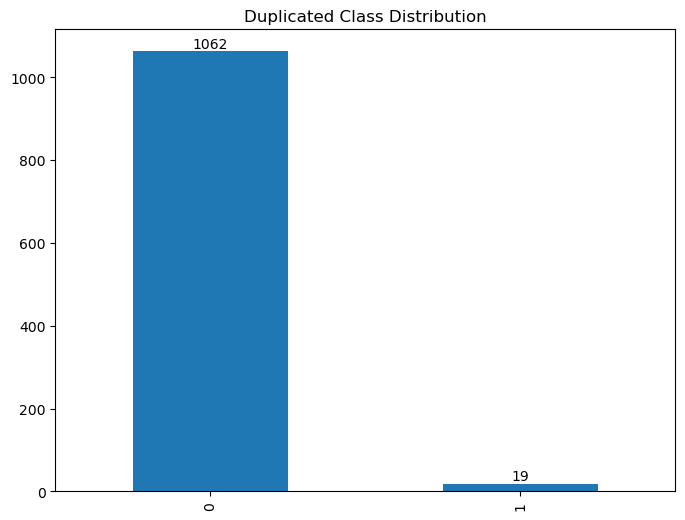

In [16]:
ax = df[df.duplicated()]["Class"].value_counts().plot.bar()
ax.bar_label(ax.containers[0])
ax.set_title('Duplicated Class Distribution');

In [17]:
df.drop_duplicates(inplace=True)

In [18]:
df.reset_index(drop=True,inplace=True)

In [630]:
df.iloc[534]

Time     406.000
V1        -2.312
V2         1.952
V3        -1.610
V4         3.998
V5        -0.522
V6        -1.427
V7        -2.537
V8         1.392
V9        -2.770
V10       -2.772
V11        3.202
V12       -2.900
V13       -0.595
V14       -4.289
V15        0.390
V16       -1.141
V17       -2.830
V18       -0.017
V19        0.417
V20        0.127
V21        0.517
V22       -0.035
V23       -0.465
V24        0.320
V25        0.045
V26        0.178
V27        0.261
V28       -0.143
Amount     0.000
Class      1.000
Name: 534, dtype: float64

#### Class

In [19]:
df.groupby('Class').describe().T

Class                 0         1
Time   count 283253.000   473.000
       mean   94835.058 80450.514
       std    47475.551 48636.180
       min        0.000   406.000
       25%    54233.000 41203.000
...                 ...       ...
Amount min        0.000     0.000
       25%        5.670     1.000
       50%       22.000     9.820
       75%       77.460   105.890
       max    25691.160  2125.870

[240 rows x 2 columns]

In [20]:
df.Class.value_counts()

0    283253
1       473
Name: Class, dtype: int64

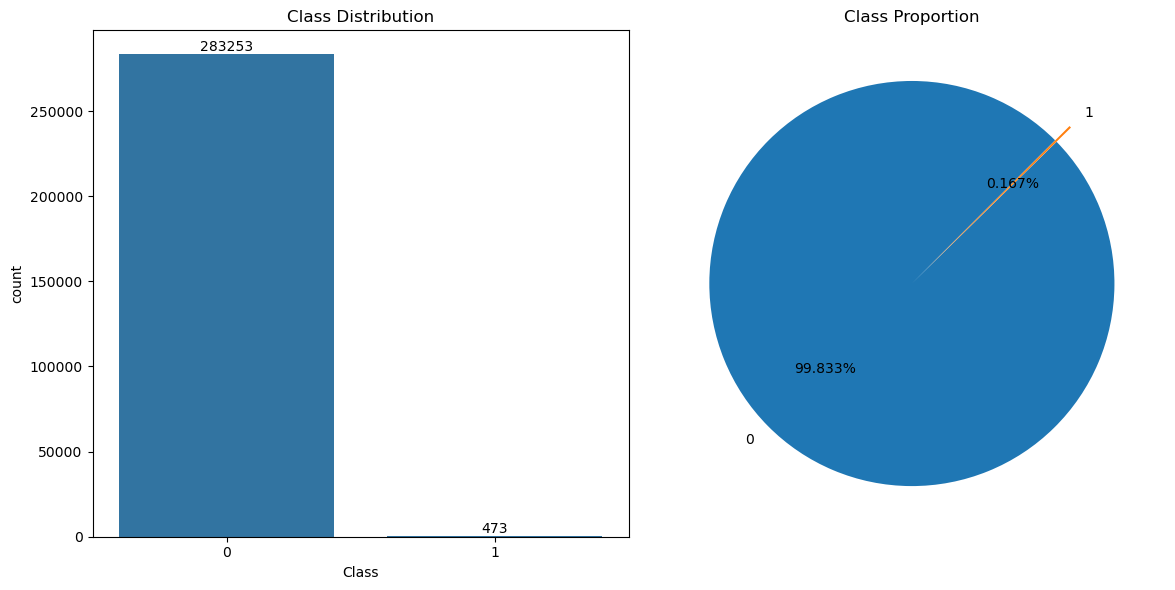

In [21]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Count plot
sns.countplot(x='Class', data=df, ax=ax1)
ax1.bar_label(ax1.containers[0])
ax1.set_title('Class Distribution')

# Pie plot
class_counts = df['Class'].value_counts()
ax2.pie(class_counts, labels=class_counts.index, autopct='%1.3f%%', startangle=45,explode=[0,0.1])
ax2.set_title('Class Proportion')

plt.tight_layout()

plt.show()

#### Time vs Class

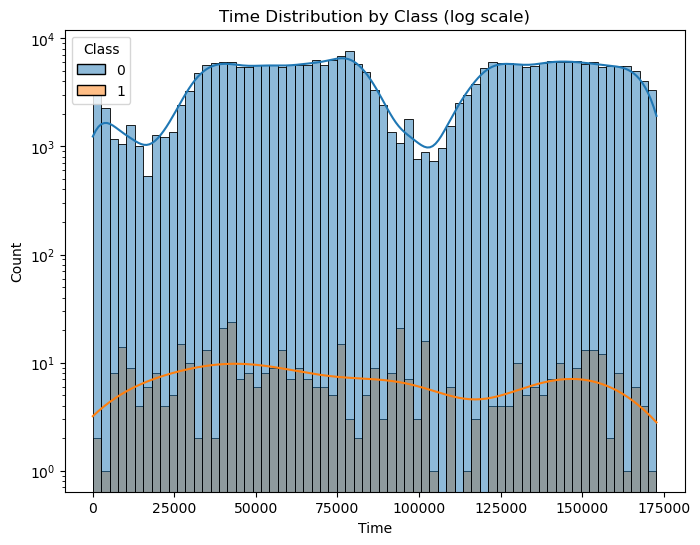

In [22]:
ax = sns.histplot(x='Time', data=df,hue='Class',kde=True)
plt.yscale('log')
ax.set_title("Time Distribution by Class (log scale)");

<AxesSubplot:xlabel='Class', ylabel='Time'>

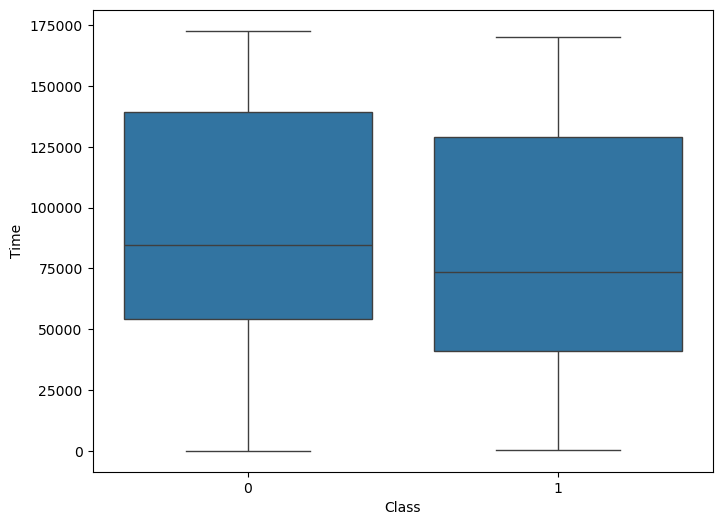

In [23]:
sns.boxplot(x='Class', y='Time', data=df)

In [24]:
df['Time_bin'] = pd.cut(df['Time'], bins=48, labels=range(48))

# Display the updated DataFrame
print(df[['Time', 'Time_bin']].tail())

             Time Time_bin
283721 172786.000       47
283722 172787.000       47
283723 172788.000       47
283724 172788.000       47
283725 172792.000       47


In [25]:
df.groupby(['Time_bin','Class'])['Class'].count()

Time_bin  Class
0         0        3929
          1           2
1         0        2211
          1           2
2         0        1552
                   ... 
45        1           2
46        0        6450
          1           6
47        0        4833
          1           4
Name: Class, Length: 96, dtype: int64

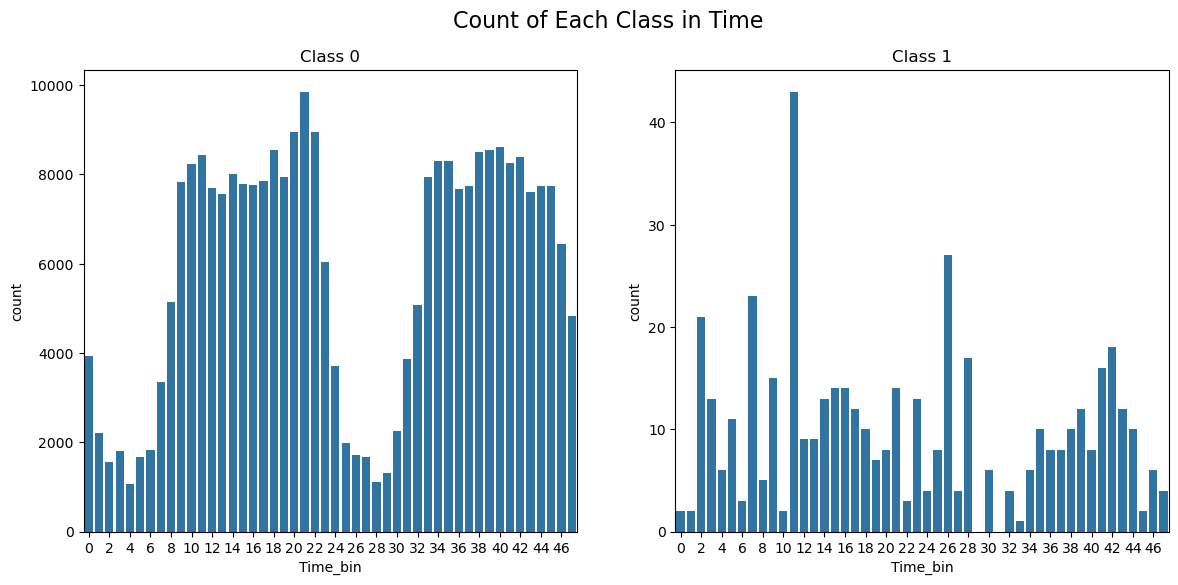

In [26]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
for i, class_value in enumerate(df['Class'].unique()):
    sns.countplot(x='Time_bin', data=df[df['Class'] == class_value], ax=axes[i])
    axes[i].set_title(f'Class {class_value}')

    # Set xticks for even numbers
    even_xticks = df['Time_bin'].unique()[::2]
    axes[i].set_xticks(even_xticks)

fig.suptitle('Count of Each Class in Time', fontsize=16);

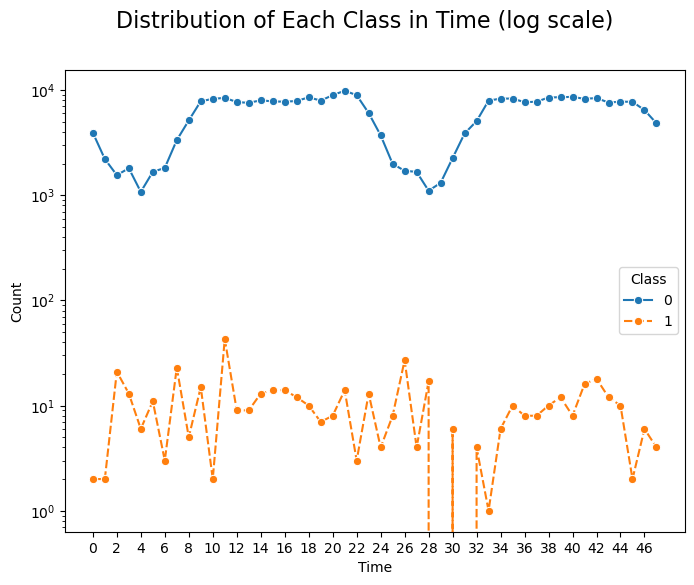

In [27]:
class_counts = df.groupby(['Time_bin', 'Class']).size().unstack(fill_value=0)

sns.lineplot(data=class_counts, marker='o')

# Set labels and title
plt.xlabel('Time')
plt.ylabel('Count')
plt.suptitle('Distribution of Each Class in Time (log scale)', fontsize=16);
plt.yscale('log')
even_xticks = df['Time_bin'].unique()[::2]
plt.xticks(even_xticks)

plt.show()

In [413]:
# sns.histplot(x='Time',bins=48,kde=True,hue='Class',data=df)
# plt.yscale('log');

#### Amount vs Class

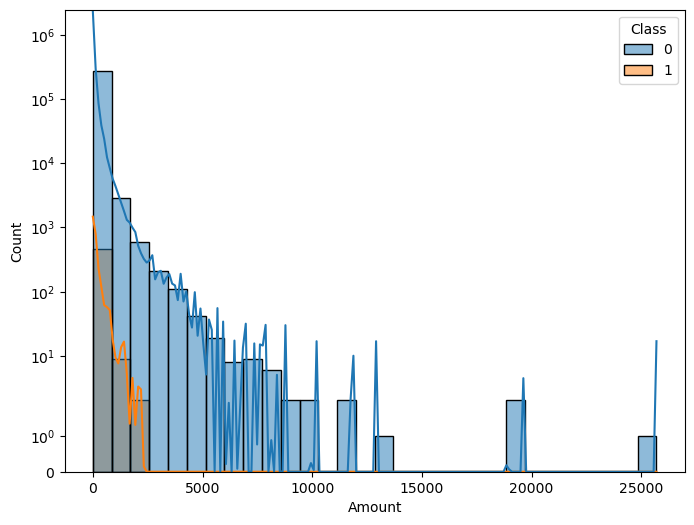

In [28]:
ax = sns.histplot(x='Amount', data=df,bins=30, hue='Class',kde=True)
plt.yscale("symlog")


**Fraud was committed in low-value transactions.**

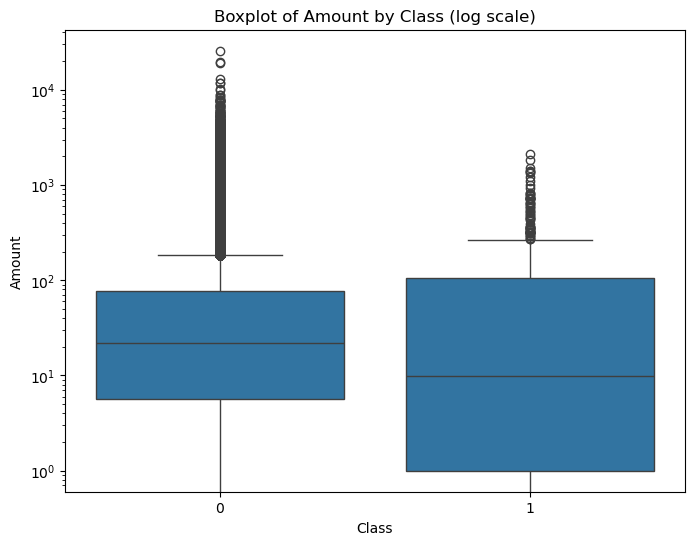

In [29]:
ax=sns.boxplot(x='Class', y='Amount', data=df);
plt.yscale('log')
ax.set_title('Boxplot of Amount by Class (log scale)');

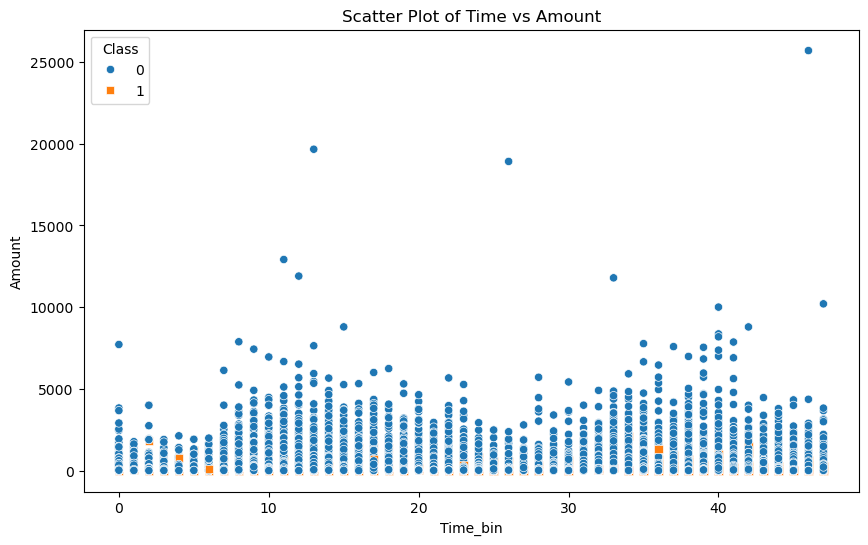

In [30]:
plt.figure(figsize=(10, 6))
ax = sns.scatterplot(x='Time_bin', y='Amount', hue='Class', data=df, style='Class',markers=['o', 's'])
ax.set_title('Scatter Plot of Time vs Amount')
plt.show()

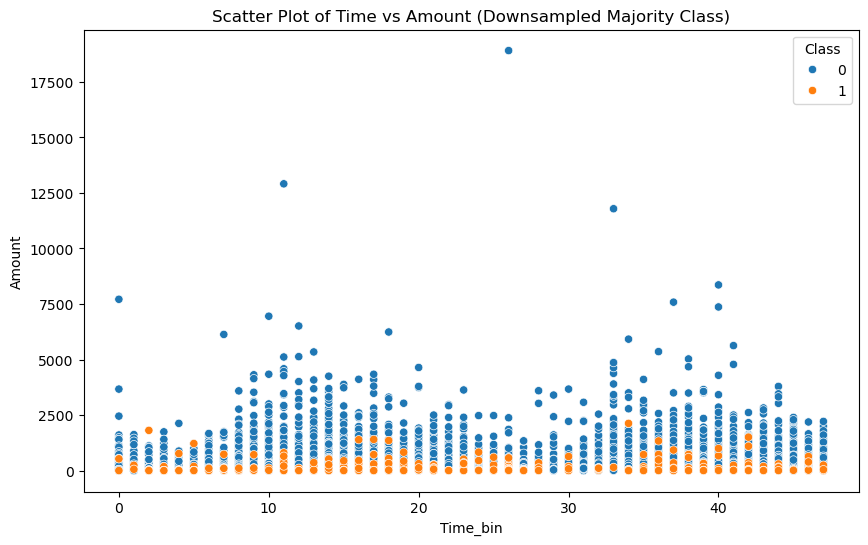

In [31]:
from sklearn.utils import resample

# Downsample majority class
df_majority = df[df['Class'] == 0]
df_minority = df[df['Class'] == 1]
df_majority_downsampled = resample(df_majority, replace=False, n_samples=100000, random_state=42)

# Combine minority class with downsampled majority class
df_downsampled = pd.concat([df_majority_downsampled, df_minority])

# Plot the downsampled data
plt.figure(figsize=(10, 6))
ax = sns.scatterplot(x='Time_bin', y='Amount', hue='Class', data=df_downsampled)
ax.set_title('Scatter Plot of Time vs Amount (Downsampled Majority Class)')
plt.show()

In [32]:
df.drop(columns=['Time_bin'],inplace=True)

#### Description of each column

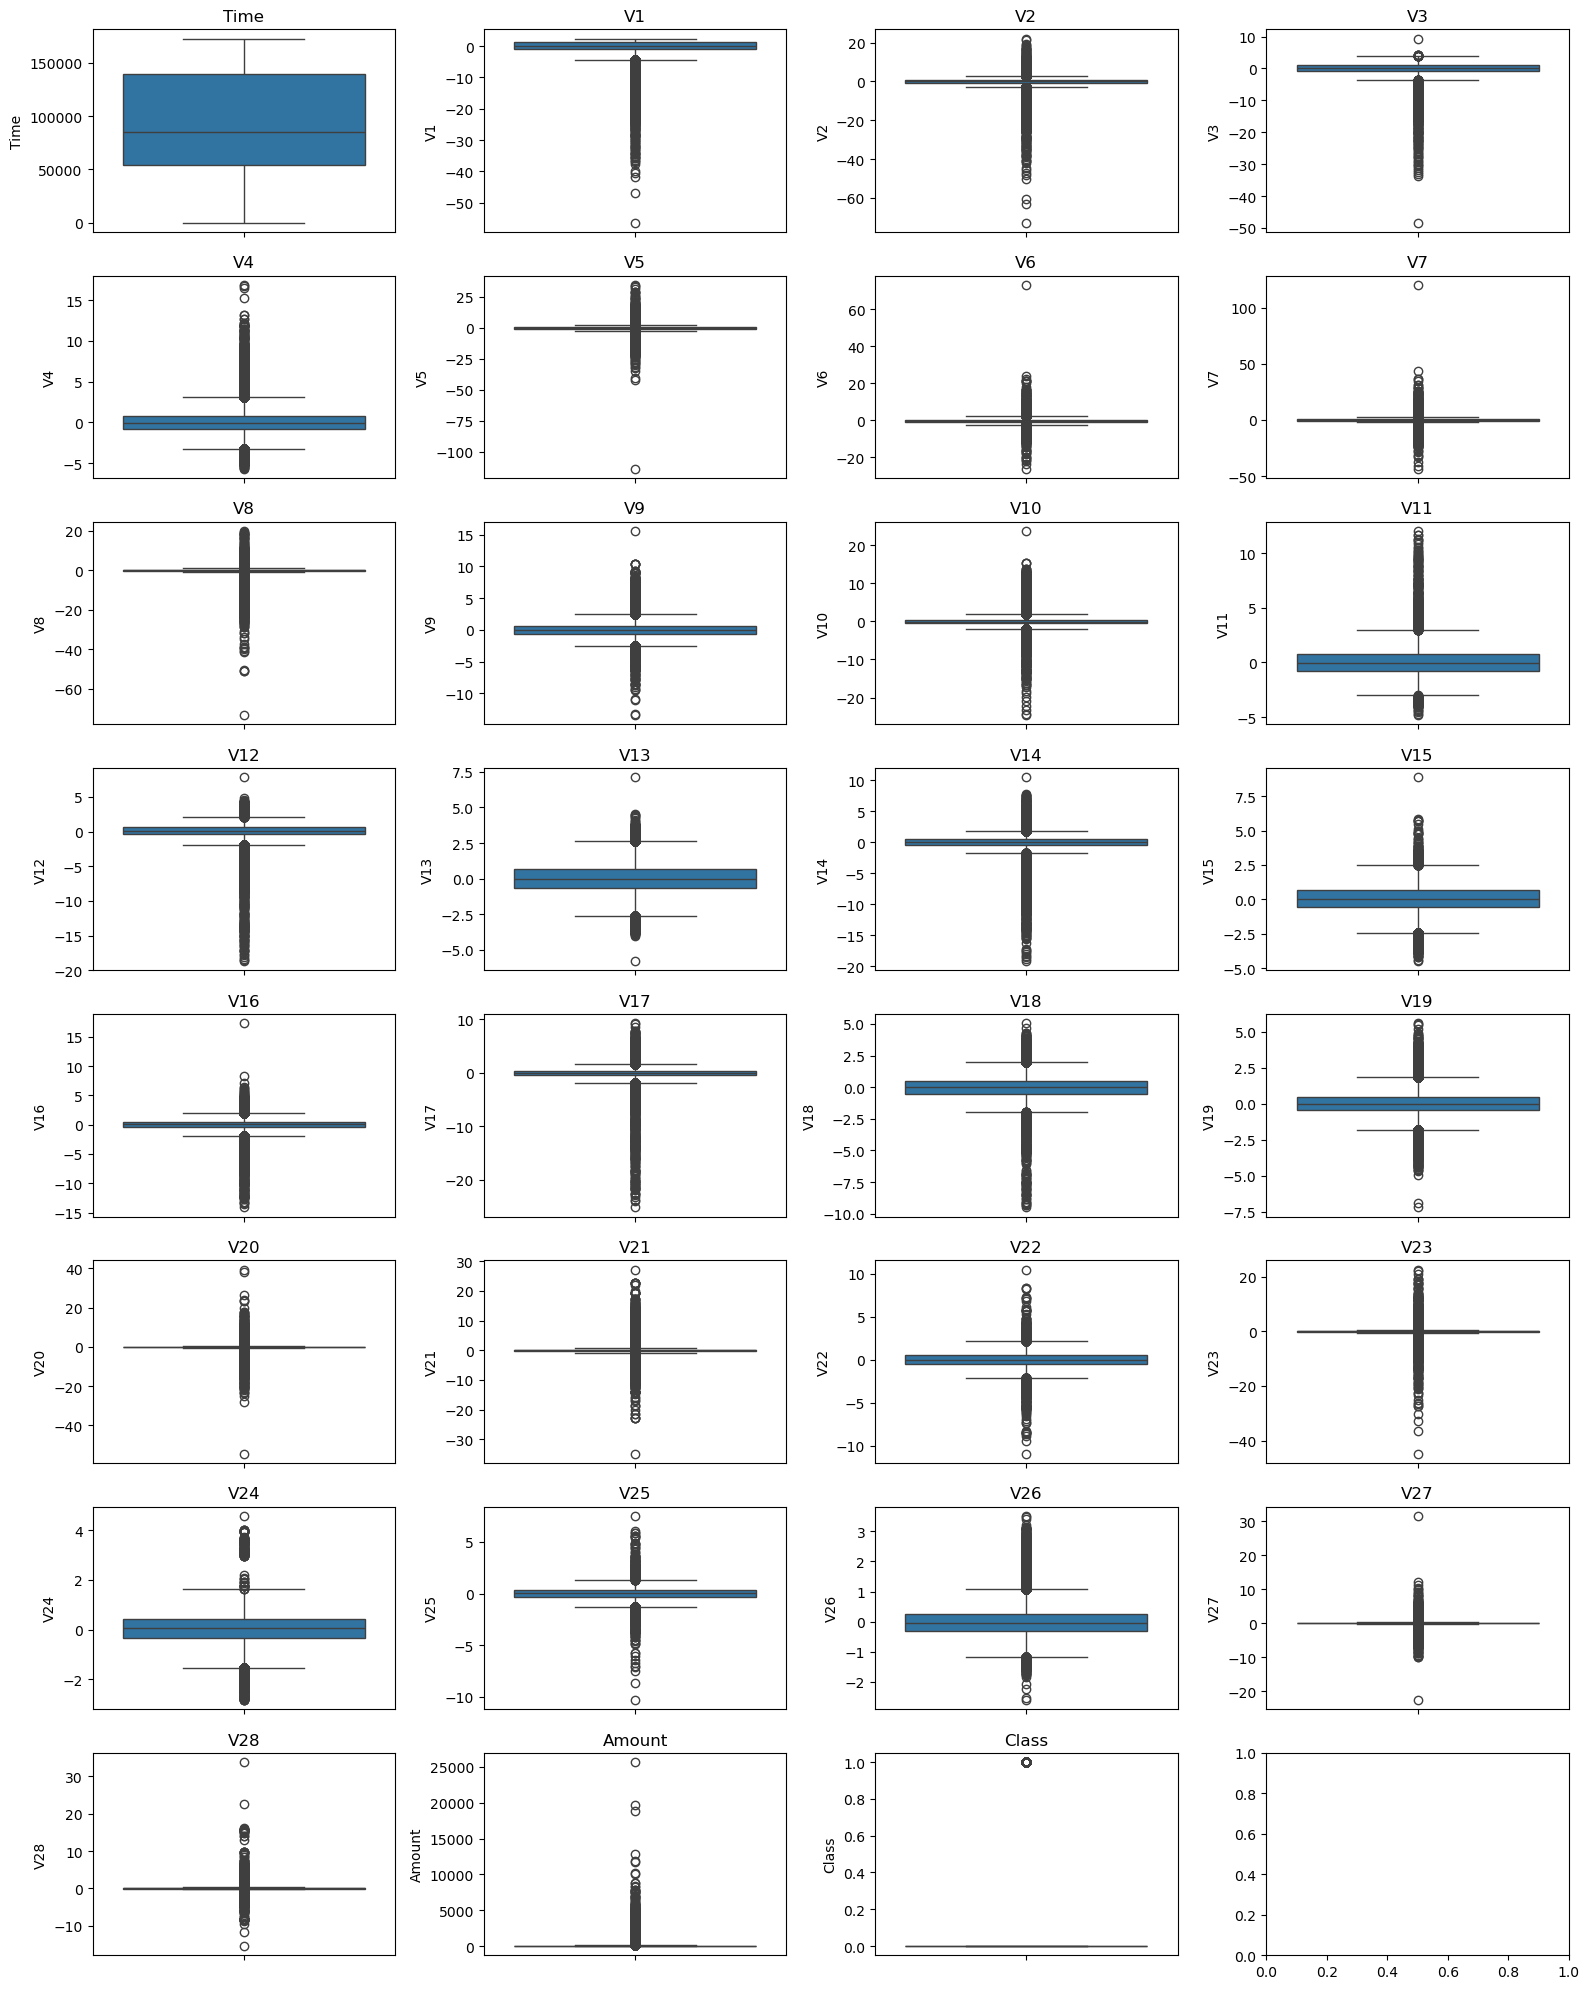

In [173]:
fig, axes = plt.subplots(8, 4, figsize=(16, 20))

axes = axes.flatten()

# Iterate through each column and plot a histogram in the corresponding subplot
for i, column in enumerate(df.select_dtypes('number').columns):
    ax = axes[i]
    sns.boxplot(data=df, y=column,ax=ax) 
    ax.set_title(column)
    
plt.tight_layout()

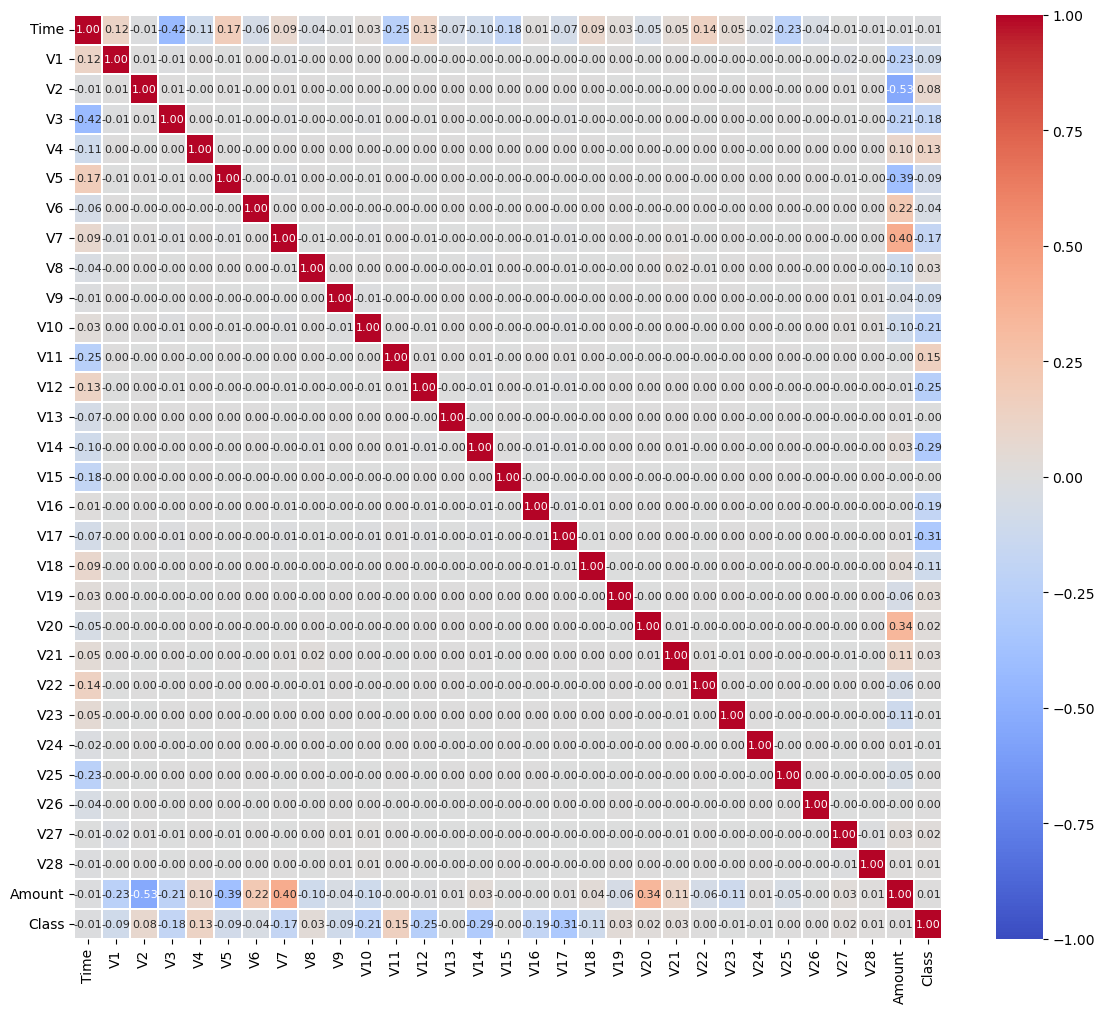

In [136]:
plt.figure(figsize=(14, 12))
sns.heatmap(df.corr(),annot=True,vmin=-1,vmax=1,cmap='coolwarm',fmt='.2f',annot_kws={"size": 8},linewidths=0.1,);

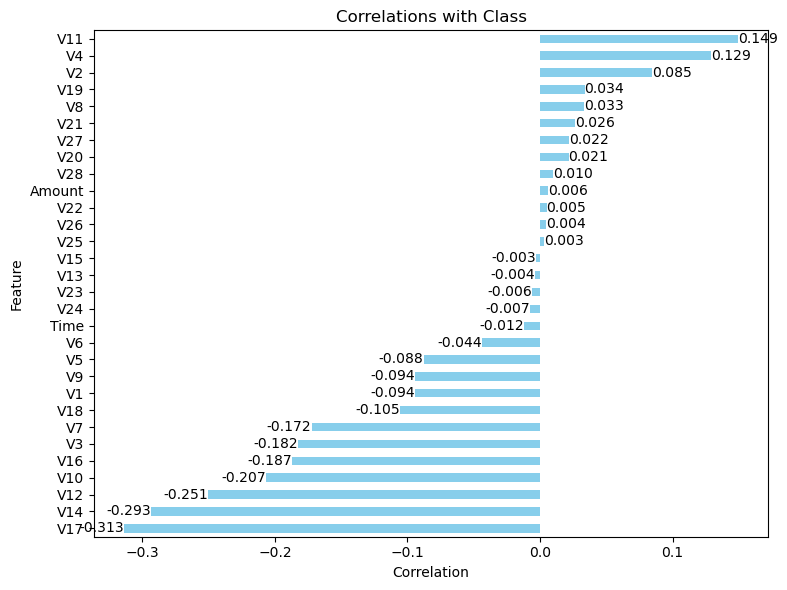

In [33]:
ax = df.corr()['Class'][:-1].sort_values().plot(kind='barh',color='skyblue')
ax.bar_label(ax.containers[0],fmt='%.3f')
plt.title('Correlations with Class')
plt.xlabel('Correlation')
plt.ylabel('Feature')
plt.tight_layout();

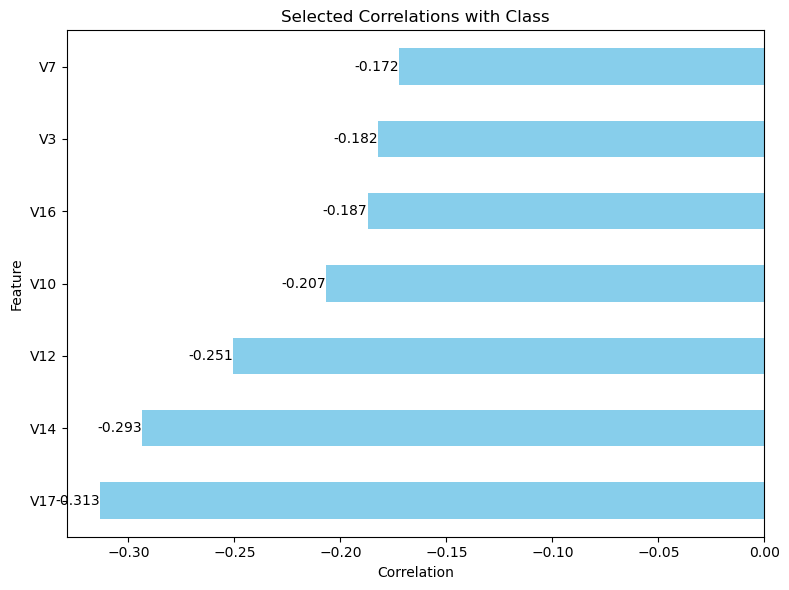

In [34]:
correlations = df.corr()['Class'][:-1]
selected_correlations = correlations[abs(correlations) > 0.15].sort_values()

# Plot the selected correlations
plt.figure(figsize=(8, 6))
ax = selected_correlations.plot(kind='barh', color='skyblue')
ax.bar_label(ax.containers[0], fmt='%.3f')
plt.title('Selected Correlations with Class')
plt.xlabel('Correlation')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

In [35]:
selected_correlations.index

Index(['V17', 'V14', 'V12', 'V10', 'V16', 'V3', 'V7'], dtype='object')

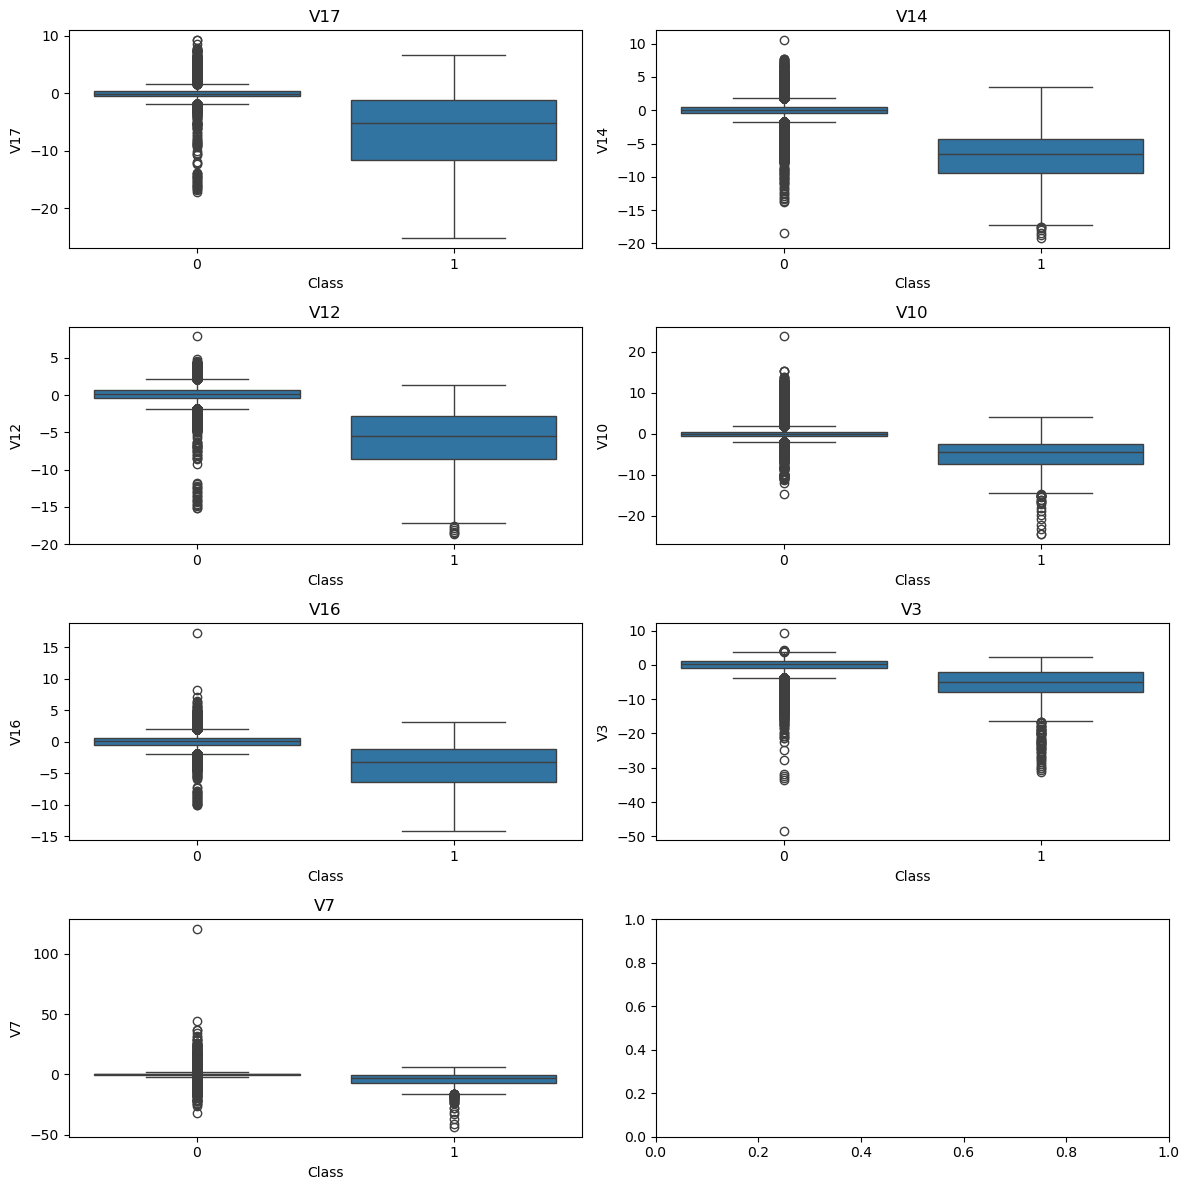

In [36]:
fig, ax = plt.subplots(4, 2, figsize=(12,12))

for i, feature in enumerate(selected_correlations.index[:8]):
    row = i // 2
    col = i % 2
    ax[row,col].set_title(feature)
    sns.boxplot(x="Class", y=feature, data=df, ax=ax[row,col])

fig.tight_layout()
plt.show()

---
---


## Data Preprocessing

#### Train - Test Split

In [556]:
X = df.drop('Class', axis=1)
y = df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

## Train-Test Validation Checks
* link : https://docs.deepchecks.com/stable/user-guide/tabular/auto_quickstarts/plot_quick_train_test_validation.html

In [38]:
#datetime_name = 'Time'
label = 'Class'
categorical_features = []
index_name = []

In [39]:
from deepchecks.tabular import Dataset

# Categorical features can be heuristically inferred, however we
# recommend to state them explicitly to avoid misclassification.

# Metadata attributes are optional. Some checks will run only if specific attributes are declared.

train_ds = Dataset(X_train, label=y_train,  
                   cat_features=categorical_features)
                   
test_ds = Dataset(X_test, label=y_test,   
                   cat_features=categorical_features)

In [40]:
# # for convenience lets save it in a dictionary so we can reuse them for future Dataset initializations
# columns_metadata = {'cat_features' : categorical_features, 'index_name': index_name,
#                     'label':label, 'datetime_name':datetime_name}

In [41]:
from deepchecks.tabular.suites import train_test_validation

validation_suite = train_test_validation()
suite_result = validation_suite.run(train_ds, test_ds)
# Note: the result can be saved as html using suite_result.save_as_html()
# or exported to json using suite_result.to_json()
suite_result

Accordion(children=(VBox(children=(HTML(value='\n<h1 id="summary_SP9KTEG2A2RWJGDWBYP9XXWZ3">Train Test Validat…

**Interpretation**

+ Features V12, V16, V17, V7 changed predictive power too much between train and test, suggesting they may not generalize well.

+ Feature V17 had very high PPS in train, increasing risk of overfitting the model to train labels.

---
---


#### Scaling

## 3. Model Building
It was previously stated that you need to make class prediction with four different algorithms. As in this case, different approaches are required to obtain better performance on unbalanced data.

This dataset is severely **unbalanced** (most of the transactions are non-fraud). So the algorithms are much more likely to classify new observations to the majority class and high accuracy won't tell us anything. To address the problem of imbalanced dataset, we can use undersampling and oversampling or class weight and optimum thresold techniques. 

### Logistic Regression 

- The steps you are going to cover for this algorithm are as follows: 

   *i. Import Libraries*
   
   *ii. Model Training*
   
   *iii. Prediction and Model Evaluating and Tuning*
   
   *iv. Plot Precision and Recall Curve*

***i. Import Libraries***

In [42]:
from sklearn.model_selection import GridSearchCV,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score, roc_auc_score

***ii. Model Training***

In [43]:
scaler = StandardScaler()
pipeline = Pipeline([('scaler', StandardScaler()), 
                     ('log', LogisticRegression(class_weight='balanced', random_state=42))])
lg = pipeline.fit(X_train,y_train)
lg.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('log',
                 LogisticRegression(class_weight='balanced', random_state=42))])

***iii. Prediction and Model Evaluating  and Tuning***

In [45]:
eval_metric(lg, X_train, y_train, X_test, y_test)

Test_Set
[[55263  1388]
 [   12    83]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56651
           1       0.06      0.87      0.11        95

    accuracy                           0.98     56746
   macro avg       0.53      0.92      0.55     56746
weighted avg       1.00      0.98      0.99     56746


Train_Set
[[221260   5342]
 [    28    350]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99    226602
           1       0.06      0.93      0.12       378

    accuracy                           0.98    226980
   macro avg       0.53      0.95      0.55    226980
weighted avg       1.00      0.98      0.99    226980




You're evaluating "accuracy score"? Is your performance metric reflect real success? You may need to use different metrics to evaluate performance on unbalanced data. You should use **[precision and recall metrics](https://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html#:~:text=The%20precision%2Drecall%20curve%20shows,a%20low%20false%20negative%20rate.)**.

In [46]:
# lg = LogisticRegression(C=0.01, max_iter=500, class_weight='balanced', random_state=42)
# lg.fit(X_train_scaled, y_train)
# eval_metric(lg, X_train_scaled, y_train, X_test_scaled, y_test)

In [ ]:
#grid search

In [52]:
scoring_metrics = ['precision','recall', 'f1', 'roc_auc']

In [114]:
# lg = LogisticRegression(class_weight='balanced', random_state=42)

# # Define parameter grid for grid search
# param_grid = {
#     'penalty': ['l1', 'l2'],
#     'C': [0.01, 0.1],
#     #'class_weight': [None, 'balanced'],
#     'solver': ['liblinear', 'saga'],  # Additional solvers
#     'max_iter': [100, 500]  # Maximum number of iterations
#     #'fit_intercept': [True, False],  # Whether to calculate the intercept
# }

# # Define scoring metrics for grid search
# #scoring_metrics = ['precision','recall', 'f1', 'roc_auc']

# # Create GridSearchCV object
# grid_search = GridSearchCV(
#     estimator=lg,
#     param_grid=param_grid,
#     scoring='f1',#=scoring_metrics
#     cv=5,
#     #refit='roc_auc',  # Refit based on ROC-AUC score
#     verbose=1
# )

# # Fit the model
# grid_search.fit(X_train_scaled, y_train)

# # Get the best parameters and the best model
# best_params = grid_search.best_params_
# best_model = grid_search.best_estimator_

# # Print best parameters
# print("Best Parameters:", best_params)

##### Hyperparameter Tuning with Optuna

In [64]:
import optuna

In [110]:
# Define an objective function for Optuna
def objective(trial):
    # Define hyperparameters to tune
    params = {
        'penalty': trial.suggest_categorical('penalty', ['l1', 'l2']),
        'C': trial.suggest_loguniform('C', 0.01, 10.0),
        'solver': trial.suggest_categorical('solver', ['liblinear', 'saga']),
        'max_iter': trial.suggest_int('max_iter', 100, 500),
        # You can add more hyperparameters here
    }

    # Create a Logistic Regression model with the suggested hyperparameters
    lg = LogisticRegression(class_weight='balanced', random_state=42, **params)

    # Use cross-validation for optimization
    score = cross_val_score(lg, X_train, y_train, cv=5, scoring=make_scorer(f1_score)).mean()

    return score

In [111]:
# Run Optuna optimization
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)  # You can adjust the number of trials

[I 2024-01-12 09:48:38,336] A new study created in memory with name: no-name-3f6277ce-f569-44af-b474-505e398284f3
[I 2024-01-12 09:50:10,076] Trial 0 finished with value: 0.009564819906417197 and parameters: {'penalty': 'l1', 'C': 0.019484069603358536, 'solver': 'saga', 'max_iter': 133}. Best is trial 0 with value: 0.009564819906417197.
[I 2024-01-12 09:50:29,458] Trial 1 finished with value: 0.11305422877007824 and parameters: {'penalty': 'l2', 'C': 0.7577602979998621, 'solver': 'liblinear', 'max_iter': 313}. Best is trial 1 with value: 0.11305422877007824.
[I 2024-01-12 09:53:22,401] Trial 2 finished with value: 0.016580189994691755 and parameters: {'penalty': 'l2', 'C': 0.33833318512709204, 'solver': 'saga', 'max_iter': 298}. Best is trial 1 with value: 0.11305422877007824.
[I 2024-01-12 09:54:54,169] Trial 3 finished with value: 0.003989367853693243 and parameters: {'penalty': 'l2', 'C': 3.068127923029454, 'solver': 'saga', 'max_iter': 155}. Best is trial 1 with value: 0.1130542287

[I 2024-01-12 10:25:50,996] Trial 36 finished with value: 0.1155447884931224 and parameters: {'penalty': 'l2', 'C': 0.010229764593129556, 'solver': 'liblinear', 'max_iter': 302}. Best is trial 32 with value: 0.11677838866785666.
[I 2024-01-12 10:26:22,563] Trial 37 finished with value: 0.11475103221320135 and parameters: {'penalty': 'l1', 'C': 0.024103590091985212, 'solver': 'liblinear', 'max_iter': 253}. Best is trial 32 with value: 0.11677838866785666.
[I 2024-01-12 10:28:04,122] Trial 38 finished with value: 0.00948779705780784 and parameters: {'penalty': 'l1', 'C': 0.04955833134571842, 'solver': 'saga', 'max_iter': 152}. Best is trial 32 with value: 0.11677838866785666.
[I 2024-01-12 10:28:18,737] Trial 39 finished with value: 0.11496065060104013 and parameters: {'penalty': 'l2', 'C': 0.014894830541118604, 'solver': 'liblinear', 'max_iter': 337}. Best is trial 32 with value: 0.11677838866785666.
[I 2024-01-12 10:28:56,487] Trial 40 finished with value: 0.11472921980132378 and param

In [112]:
# Get the best parameters
best_params = study.best_params
# Print best parameters
print("Best Parameters:", best_params)

Best Parameters: {'penalty': 'l1', 'C': 0.010169957049403681, 'solver': 'liblinear', 'max_iter': 279}


In [553]:
best_params_lg= {'penalty': 'l1', 'C': 0.010169957049403681, 'solver': 'liblinear', 'max_iter': 279}

In [16]:
#After tuning : Best Parameters: {'penalty': 'l1', 'C': 0.010169957049403681, 'solver': 'liblinear', 'max_iter': 279}

In [568]:
scaler = StandardScaler()
pipeline = Pipeline([('scaler', StandardScaler()), 
                     ('log', LogisticRegression(class_weight='balanced', **best_params_lg, random_state=42))])
lg = pipeline.fit(X_train,y_train)
lg.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('log',
                 LogisticRegression(C=0.010169957049403681,
                                    class_weight='balanced', max_iter=279,
                                    penalty='l1', random_state=42,
                                    solver='liblinear'))])

In [558]:
eval_metric(lg, X_train, y_train, X_test, y_test)

Test_Set
[[55318  1333]
 [   12    83]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56651
           1       0.06      0.87      0.11        95

    accuracy                           0.98     56746
   macro avg       0.53      0.93      0.55     56746
weighted avg       1.00      0.98      0.99     56746


Train_Set
[[221394   5208]
 [    30    348]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99    226602
           1       0.06      0.92      0.12       378

    accuracy                           0.98    226980
   macro avg       0.53      0.95      0.55    226980
weighted avg       1.00      0.98      0.99    226980



***iv. Plot Precision and Recall Curve***


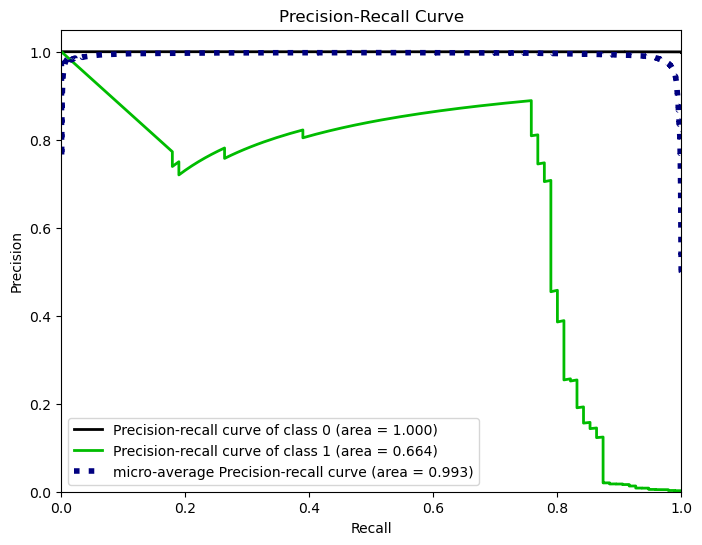

In [559]:
y_pred_proba = lg.predict_proba(X_test)
plot_precision_recall(y_test, y_pred_proba)
plt.show();

In [ ]:
#cross validation

In [564]:
y_pred = lg.predict(X_test)
precision_score(y_test, y_pred)

0.05861581920903955

In [565]:
lg_f1 = f1_score(y_test, y_pred)
lg_acc = accuracy_score(y_test, y_pred)
lg_prec = precision_score(y_test, y_pred)
lg_recall = recall_score(y_test, y_pred)
lg_auc = roc_auc_score(y_test, y_pred)

In [512]:
scaler = StandardScaler()
pipeline = Pipeline([('scaler', StandardScaler()), 
                     ('log', LogisticRegression(class_weight='balanced', **best_params_lg, random_state=42))])
lg = pipeline.fit(X_train,y_train)

scores = cross_validate(lg,
                        X_train,
                        y_train,
                        scoring=scoring_metrics,
                        cv = 3,
                        return_train_score=True)
lg_scores = pd.DataFrame(scores)
lg_scores.mean()[2:]

test_precision    0.062
train_precision   0.063
test_recall       0.907
train_recall      0.921
test_f1           0.115
train_f1          0.118
test_roc_auc      0.983
train_roc_auc     0.990
dtype: float64

- Didn't the performance of the model you implemented above satisfy you? If your model is biased towards the majority class and minority class matrics is not sufficient, apply "unbalanced data tecniques".

***v. Apply Model Evaluation Checks***
* link : https://docs.deepchecks.com/stable/user-guide/tabular/auto_quickstarts/plot_quick_model_evaluation.html

In [54]:
scaler = StandardScaler()
pipeline = Pipeline([('scaler', StandardScaler()), 
                     ('log', LogisticRegression(class_weight='balanced', **best_params_lg, random_state=42))])
lg = pipeline.fit(X_train,y_train)
lg.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('log',
                 LogisticRegression(C=0.010169957049403681,
                                    class_weight='balanced', max_iter=279,
                                    penalty='l1', random_state=42,
                                    solver='liblinear'))])

In [60]:
# y_train_i = y_train.reset_index(drop=True)
# y_test_i = y_test.reset_index(drop=True,inplace=True)

In [55]:
from deepchecks.tabular import Dataset
train_ds = Dataset(X_train, label=y_train, cat_features=[])
test_ds = Dataset(X_test, label=y_test, cat_features=[])

In [56]:
from deepchecks.tabular.suites import model_evaluation

evaluation_suite = model_evaluation()
suite_result = evaluation_suite.run(train_ds, test_ds, lg)
# Note: the result can be saved as html using suite_result.save_as_html()
# or exported to json using suite_result.to_json()
suite_result.show()

deepchecks - WARNING - Cannot use model's built-in feature importance on a Scikit-learn Pipeline, using permutation feature importance calculation instead
deepchecks - INFO - Calculating permutation feature importance. Expected to finish in 18 seconds


Accordion(children=(VBox(children=(HTML(value='\n<h1 id="summary_KD2HAPNYXZY22C4E5NB8C877K">Model Evaluation S…

Simple Model Comparison

The warning indicates that the model's performance gain over a simpler model is not significantly better than expected. Specifically, the F1 score for a particular class (class 0) has decreased by 1333.69% compared to the simpler model. This suggests that the model may not be performing as well as it could be for certain classes.

Weak Segments Performance

The warning indicates that there are segments in the dataset that are performing significantly worse than the average model performance. For both the training and test datasets, there are segments with an accuracy score of around 0.7, which is significantly lower than the average accuracy score of 0.975. This suggests that there may be some data quality issues or biases in the dataset that are causing the model to perform poorly on certain segments.

Unused Features

The warning indicates that there are a number of features in the dataset that are not being used by the model. Specifically, there are 7 high-variance features that are not being used in the training dataset and 8 high-variance features that are not being used in the test dataset. This suggests that these features may not be relevant to the task at hand and could be removed from the dataset to improve model performance and reduce computational cost.

### Logistic Regression with Unbalanced Data Techniques

#### Class Weight

In [57]:
from sklearn.utils import class_weight

In [527]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [59]:
class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)

In [60]:
class_weights

array([  0.50084511, 296.31853786])

In [61]:
class_weights = {0:0.50084511,1:10}

In [62]:
operations = [("scaler", scaler),
              ("log", LogisticRegression(random_state=42, penalty='l1', 
                                         C=0.01, solver='saga',max_iter=250,
                                         class_weight=class_weights))]
ulg = Pipeline(operations)

ulg.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('log',
                 LogisticRegression(C=0.01, class_weight={0: 0.50084511, 1: 10},
                                    max_iter=250, penalty='l1', random_state=42,
                                    solver='saga'))])

In [63]:
eval_metric(ulg, X_train, y_train, X_test, y_test)

Test_Set
[[56627    29]
 [   20    70]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56656
           1       0.71      0.78      0.74        90

    accuracy                           1.00     56746
   macro avg       0.85      0.89      0.87     56746
weighted avg       1.00      1.00      1.00     56746


Train_Set
[[226471    126]
 [    65    318]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    226597
           1       0.72      0.83      0.77       383

    accuracy                           1.00    226980
   macro avg       0.86      0.91      0.88    226980
weighted avg       1.00      1.00      1.00    226980



In [65]:
#Hyperparameter tuning with OPTUNA
import optuna

In [69]:
class_weights = {0: 0.50084511, 1: 10}

def objective(trial):
    # Define hyperparameters to search
    penalty = trial.suggest_categorical('penalty', ['l1', 'l2'])
    C = trial.suggest_loguniform('C', 1e-4, 1e4)
    solver = trial.suggest_categorical('solver', ['liblinear', 'saga'])
    class_weight_factor = trial.suggest_loguniform('class_weight_factor', 0.1, 100.0)

    # Adjust class weights based on the factor
    adjusted_class_weights = {0: class_weights[0], 1: class_weights[1] * class_weight_factor}

    # Create a pipeline with suggested parameters
    scaler = StandardScaler()
    logistic_regression = LogisticRegression(
        random_state=42,
        penalty=penalty,
        C=C,
        solver=solver,
        max_iter=250,
        class_weight=adjusted_class_weights
    )

    operations = [("scaler", scaler), ("log", logistic_regression)]
    ulg = Pipeline(operations)

    # Evaluate the pipeline using cross-validation
    scores = cross_val_score(ulg, X_train, y_train, cv=5, scoring=make_scorer(f1_score))

    return scores.mean()

In [70]:
# Set up the Optuna study
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=20)

[I 2024-01-15 15:11:20,658] A new study created in memory with name: no-name-16ab13b1-1bca-4a47-8cef-9312ad630433
[I 2024-01-15 15:11:49,600] Trial 0 finished with value: 0.5453412534619069 and parameters: {'penalty': 'l2', 'C': 0.0001153762014568617, 'solver': 'saga', 'class_weight_factor': 10.39841700958096}. Best is trial 0 with value: 0.5453412534619069.
[I 2024-01-15 15:13:21,795] Trial 1 finished with value: 0.7777868470181047 and parameters: {'penalty': 'l1', 'C': 6.602232092188292, 'solver': 'liblinear', 'class_weight_factor': 0.5301878695714063}. Best is trial 1 with value: 0.7777868470181047.
[I 2024-01-15 15:13:25,887] Trial 2 finished with value: 0.6404499527989753 and parameters: {'penalty': 'l1', 'C': 0.0002345592049551584, 'solver': 'liblinear', 'class_weight_factor': 6.242031755116243}. Best is trial 1 with value: 0.7777868470181047.
[I 2024-01-15 15:13:30,126] Trial 3 finished with value: 0.2085842572939812 and parameters: {'penalty': 'l1', 'C': 0.00020067793303613104,

In [71]:
best_trial = study.best_trial
print("Value: ", best_trial.value)
print("Params: ")
for key, value in best_trial.params.items():
    print(f"    {key}: {value}")

Value:  0.8154326225067912
Params: 
    penalty: l2
    C: 0.001491251537062207
    solver: liblinear
    class_weight_factor: 0.2568938156037596


In [74]:
best_params_lgw = {'penalty': 'l2', 'solver': 'liblinear', 'C': 0.001491251537062207}

In [76]:
class_weight_factor =  0.2568938156037596
class_weights = {0: 0.50084511, 1: 10}
class_weights_w = {0: class_weights[0], 1: class_weights[1] * class_weight_factor}

In [ ]:
#cross validation

In [77]:
operations = [("scaler", scaler),
              ("log", LogisticRegression(random_state=42, **best_params_lgw,max_iter=250,
                                         class_weight=class_weights_w))]

# Create a pipeline
ulg = Pipeline(operations)

scores = cross_validate(ulg,
                        X_train,
                        y_train,
                        scoring=scoring_metrics,
                        cv = 5,
                        return_train_score=True)
ulg_class_w = pd.DataFrame(scores)
ulg_class_w.mean()[2:]

test_precision    0.862
train_precision   0.861
test_recall       0.775
train_recall      0.779
test_f1           0.815
train_f1          0.818
test_roc_auc      0.982
train_roc_auc     0.984
dtype: float64

In [569]:
operations = [("scaler", scaler),
              ("log", LogisticRegression(random_state=42, **best_params_lgw,max_iter=250,
                                         class_weight=class_weights_w))]

pipeline = Pipeline(operations)
lg_w = pipeline.fit(X_train,y_train)
lg_w.fit(X_train, y_train)
eval_metric(lg_w,X_train, y_train, X_test, y_test)

Test_Set
[[56642     9]
 [   25    70]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.89      0.74      0.80        95

    accuracy                           1.00     56746
   macro avg       0.94      0.87      0.90     56746
weighted avg       1.00      1.00      1.00     56746


Train_Set
[[226557     45]
 [    83    295]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    226602
           1       0.87      0.78      0.82       378

    accuracy                           1.00    226980
   macro avg       0.93      0.89      0.91    226980
weighted avg       1.00      1.00      1.00    226980



In [570]:
y_pred = lg_w.predict(X_test)
precision_score(y_test, y_pred)

0.8860759493670886

In [571]:
ulg_class_w_f1 = f1_score(y_test, y_pred)
ulg_class_w_acc = accuracy_score(y_test, y_pred)
ulg_class_w_prec = precision_score(y_test, y_pred)
ulg_class_w_recall = recall_score(y_test, y_pred)
ulg_class_w_auc = roc_auc_score(y_test, y_pred)

In [ ]:
#Precision Recall Curve

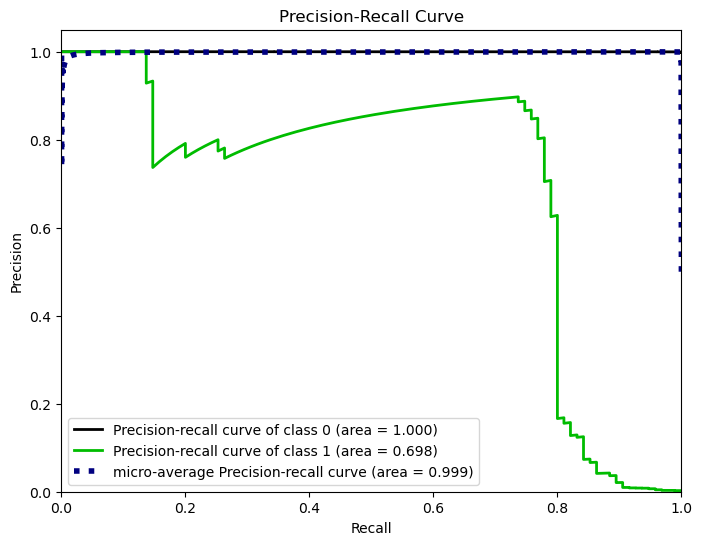

In [520]:
y_pred_proba = lg_w.predict_proba(X_test)
plot_precision_recall(y_test, y_pred_proba)
plt.show();

In [83]:
class_weights = {0: 0.50084511, 1: 10}

def objective(trial):
    # Define hyperparameters to search
    penalty = trial.suggest_categorical('penalty', ['l1', 'l2'])
    C = trial.suggest_loguniform('C', 1e-4, 1e4)
    solver = trial.suggest_categorical('solver', ['liblinear', 'saga'])
    class_weight_factor = trial.suggest_loguniform('class_weight_factor', 0.1, 100.0)

    # Adjust class weights based on the factor
    adjusted_class_weights = {0: class_weights[0], 1: class_weights[1] * class_weight_factor}

    # Create a pipeline with suggested parameters
    scaler = StandardScaler()
    logistic_regression = LogisticRegression(
        random_state=42,
        penalty=penalty,
        C=C,
        solver=solver,
        max_iter=250,
        class_weight=adjusted_class_weights
    )

    operations = [("scaler", scaler), ("log", logistic_regression)]
    ulg = Pipeline(operations)

    # Evaluate the pipeline using cross-validation
    scores = cross_val_score(ulg, X_train, y_train, cv=5, scoring=make_scorer(recall_score, pos_label=1))
    return scores.mean()

In [84]:
# Set up the Optuna study
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=20)

[I 2024-01-15 15:46:05,615] A new study created in memory with name: no-name-f6dc02f2-b7b1-4532-b183-f131658b1808
[I 2024-01-15 15:48:07,421] Trial 0 finished with value: 0.8274777853725223 and parameters: {'penalty': 'l2', 'C': 0.17900332362978186, 'solver': 'saga', 'class_weight_factor': 0.9522949196936118}. Best is trial 0 with value: 0.8274777853725223.
[I 2024-01-15 15:48:18,000] Trial 1 finished with value: 0.9241626794258373 and parameters: {'penalty': 'l2', 'C': 0.6611331656251436, 'solver': 'liblinear', 'class_weight_factor': 75.56512666677808}. Best is trial 1 with value: 0.9241626794258373.
[I 2024-01-15 15:50:35,240] Trial 2 finished with value: 0.8666097060833902 and parameters: {'penalty': 'l1', 'C': 2.3067425334414366, 'solver': 'saga', 'class_weight_factor': 4.819770166445649}. Best is trial 1 with value: 0.9241626794258373.
[I 2024-01-15 15:52:37,064] Trial 3 finished with value: 0.8196514012303485 and parameters: {'penalty': 'l2', 'C': 0.057805403736847734, 'solver': 

In [85]:
best_trial = study.best_trial
print("Value: ", best_trial.value)
print("Params: ")
for key, value in best_trial.params.items():
    print(f"    {key}: {value}")

Value:  0.9346548188653451
Params: 
    penalty: l2
    C: 0.0002284411128282922
    solver: liblinear
    class_weight_factor: 99.63501154268903


In [86]:
best_params_lgwr = {'penalty': 'l2', 'solver': 'liblinear', 'C': 0.0002284411128282922}

In [87]:
class_weight_factor =  99.63501154268903
class_weights = {0: 0.50084511, 1: 10}
class_weights_wr = {0: class_weights[0], 1: class_weights[1] * class_weight_factor}

In [91]:
operations = [("scaler", scaler),
              ("log", LogisticRegression(random_state=42, **best_params_lgwr,max_iter=250,
                                         class_weight=class_weights_wr))]

pipeline = Pipeline(operations)
lg_wr = pipeline.fit(X_train,y_train)
lg_wr.fit(X_train, y_train)
eval_metric(lg_wr,X_train, y_train, X_test, y_test)

Test_Set
[[51848  4808]
 [    8    82]]
              precision    recall  f1-score   support

           0       1.00      0.92      0.96     56656
           1       0.02      0.91      0.03        90

    accuracy                           0.92     56746
   macro avg       0.51      0.91      0.49     56746
weighted avg       1.00      0.92      0.95     56746


Train_Set
[[207262  19335]
 [    16    367]]
              precision    recall  f1-score   support

           0       1.00      0.91      0.96    226597
           1       0.02      0.96      0.04       383

    accuracy                           0.91    226980
   macro avg       0.51      0.94      0.50    226980
weighted avg       1.00      0.91      0.95    226980



In [ ]:
# The precision is so low!

#### Feature importance for LG with class weight and f1 score

In [233]:
# Get coefficients 
coefficients = lg_w.named_steps['log'].coef_[0]

# Convert to DataFrame
feat_imp_lg = pd.DataFrame({'Feature':X_train.columns,  
                         'Coefficient':coefficients})

# Sort by decreasing coefficient value    
feat_imp_lg.sort_values(by='Coefficient', ascending=False, inplace=True)

feat_imp_lg

,Feature,Coefficient
4,V4,0.146
11,V11,0.116
2,V2,0.044
21,V21,0.026
29,Amount,0.026
22,V22,0.013
27,V27,0.010
28,V28,0.008
5,V5,0.006
19,V19,0.005


In [90]:
operations = [("scaler", scaler),
              ("log", LogisticRegression(random_state=42, **best_params_lgwr,max_iter=250,
                                         class_weight=class_weights_wr))]

# Create a pipeline
ulg = Pipeline(operations)

scores = cross_validate(ulg,
                        X_train,
                        y_train,
                        scoring=scoring_metrics,
                        cv = 5,
                        return_train_score=True)
ulg_class_wr = pd.DataFrame(scores)
ulg_class_wr.mean()[2:]

test_precision    0.018
train_precision   0.019
test_recall       0.935
train_recall      0.962
test_f1           0.036
train_f1          0.037
test_roc_auc      0.976
train_roc_auc     0.989
dtype: float64

***v. Model Evaluation Checks for Logistic Regression with Class Weight and F1 Score***
* link : https://docs.deepchecks.com/stable/user-guide/tabular/auto_quickstarts/plot_quick_model_evaluation.html

In [92]:
from deepchecks.tabular import Dataset
train_ds = Dataset(X_train, label=y_train, cat_features=[])
test_ds = Dataset(X_test, label=y_test, cat_features=[])

In [93]:
from deepchecks.tabular.suites import model_evaluation

evaluation_suite = model_evaluation()
suite_result = evaluation_suite.run(train_ds, test_ds, lg_w)
# Note: the result can be saved as html using suite_result.save_as_html()
# or exported to json using suite_result.to_json()
suite_result.show()

deepchecks - WARNING - Cannot use model's built-in feature importance on a Scikit-learn Pipeline, using permutation feature importance calculation instead
deepchecks - INFO - Calculating permutation feature importance. Expected to finish in 12 seconds


Accordion(children=(VBox(children=(HTML(value='\n<h1 id="summary_Y7FFZXEO4YI07OGVUG5ZJMQ2Q">Model Evaluation S…

**Features above the line are a sample of the most important features, while the features below the line are the unused features with highest variance, as defined by check parameters**

#### SMOTE

In [95]:
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

***i. Train-Test Split (Again)***

In [572]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [77]:
# # Define the target percentage for both classes
# target_percentage = 0.15

# # Random Under-sampling for the majority class
# rus = RandomUnderSampler(sampling_strategy=target_percentage, random_state=42)
# X_train_undersampled, y_train_undersampled = rus.fit_resample(X_train_scaled, y_train)

# # SMOTE for the minority class
# smote = SMOTE(sampling_strategy=target_percentage, random_state=42)
# X_train_resampled, y_train_resampled = smote.fit_resample(X_train_undersampled, y_train_undersampled)

In [96]:
# Define the operations
over = SMOTE(sampling_strategy=0.15, random_state=42)
under = RandomUnderSampler(sampling_strategy=0.15, random_state=42)
scaler = StandardScaler()

***ii. Model Training***

In [104]:
operations = [("scaler", scaler),('o', over), ('u', under),
              ("log", LogisticRegression(random_state=42, **best_params_lgwr,max_iter=250))]

# Create a pipeline
lg_s = Pipeline(operations)

# Fit the pipeline on the training data
lg_s.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('o', SMOTE(random_state=42, sampling_strategy=0.15)),
                ('u',
                 RandomUnderSampler(random_state=42, sampling_strategy=0.15)),
                ('log',
                 LogisticRegression(C=0.0002284411128282922, max_iter=250,
                                    random_state=42, solver='liblinear'))])

***Prediction and Model Evaluating and Tuning***

In [105]:
eval_metric(lg_s, X_train, y_train, X_test, y_test)

Test_Set
[[56595    61]
 [   18    72]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56656
           1       0.54      0.80      0.65        90

    accuracy                           1.00     56746
   macro avg       0.77      0.90      0.82     56746
weighted avg       1.00      1.00      1.00     56746


Train_Set
[[226357    240]
 [    56    327]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    226597
           1       0.58      0.85      0.69       383

    accuracy                           1.00    226980
   macro avg       0.79      0.93      0.84    226980
weighted avg       1.00      1.00      1.00    226980



In [106]:
operations = [("scaler", scaler),('o', over), ('u', under),
              ("log", LogisticRegression(random_state=42, **best_params_lgwr))]

# Create a pipeline
lg_s = Pipeline(operations)

scores = cross_validate(lg_s,
                        X_train,
                        y_train,
                        scoring=scoring_metrics,
                        cv = 5,
                        return_train_score=True)
lg_s_scores = pd.DataFrame(scores)
lg_s_scores.mean()[2:]

test_precision    0.589
train_precision   0.589
test_recall       0.851
train_recall      0.855
test_f1           0.696
train_f1          0.698
test_roc_auc      0.977
train_roc_auc     0.985
dtype: float64

In [573]:
operations = [("scaler", scaler),('o', over), ('u', under),
              ("log", LogisticRegression(random_state=42, **best_params_lgwr))]

# Create a pipeline
lg_s = Pipeline(operations)

# Fit the pipeline on the training data
lg_s.fit(X_train, y_train)
eval_metric(lg_s, X_train, y_train, X_test, y_test)

Test_Set
[[55406  1250]
 [   11    79]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56656
           1       0.06      0.88      0.11        90

    accuracy                           0.98     56746
   macro avg       0.53      0.93      0.55     56746
weighted avg       1.00      0.98      0.99     56746


Train_Set
[[221570   5027]
 [    33    350]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99    226597
           1       0.07      0.91      0.12       383

    accuracy                           0.98    226980
   macro avg       0.53      0.95      0.56    226980
weighted avg       1.00      0.98      0.99    226980



In [574]:
y_pred = lg_s.predict(X_test)
precision_score(y_test, y_pred)

0.059443190368698266

In [575]:
lg_s_f1 = f1_score(y_test, y_pred)
lg_s_acc = accuracy_score(y_test, y_pred)
lg_s_prec = precision_score(y_test, y_pred)
lg_s_recall = recall_score(y_test, y_pred)
lg_s_auc = roc_auc_score(y_test, y_pred)

***iv.  Plot Precision and Recall Curve***


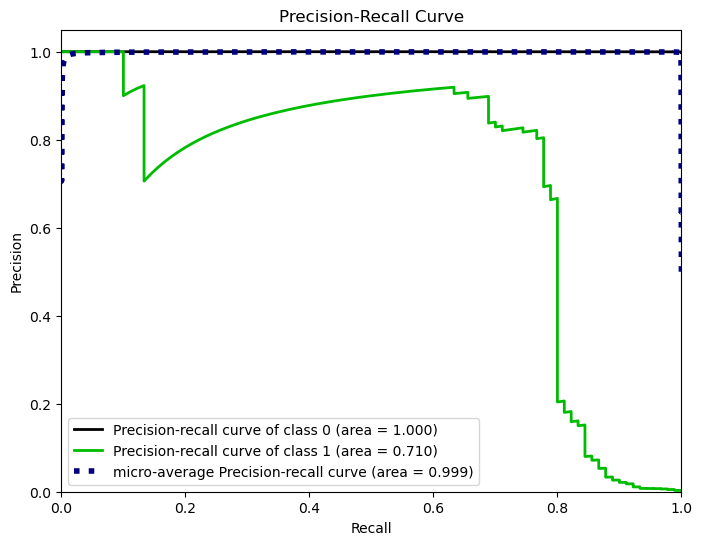

In [110]:
y_pred_proba = lg_s.predict_proba(X_test)
plot_precision_recall(y_test, y_pred_proba)
plt.show();

### Random Forest Classifier with Unbalanced Data Techniques
   

In [111]:
from sklearn.ensemble import RandomForestClassifier

***i. Model Training***

In [576]:
class_weights = {0:0.50084511,1:10}

In [120]:
operations = [("scaler", scaler),
              ("ran_for", RandomForestClassifier(class_weight=class_weights,random_state=42))]

rf = Pipeline(operations)

rf.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('ran_for',
                 RandomForestClassifier(class_weight={0: 0.50084511, 1: 10},
                                        random_state=42))])

***ii. Prediction and Model Evaluating and Tuning***

In [121]:
eval_metric(rf, X_train, y_train, X_test, y_test)

Test_Set
[[56654     2]
 [   26    64]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56656
           1       0.97      0.71      0.82        90

    accuracy                           1.00     56746
   macro avg       0.98      0.86      0.91     56746
weighted avg       1.00      1.00      1.00     56746


Train_Set
[[226597      0]
 [     0    383]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    226597
           1       1.00      1.00      1.00       383

    accuracy                           1.00    226980
   macro avg       1.00      1.00      1.00    226980
weighted avg       1.00      1.00      1.00    226980



***iii. Plot Precision and Recall Curve***


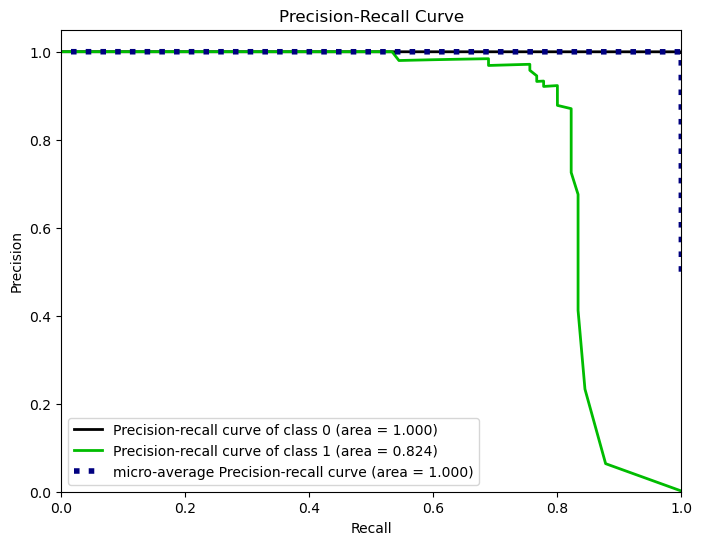

In [117]:
y_pred_proba = rf.predict_proba(X_test)
plot_precision_recall(y_test, y_pred_proba)
plt.show();

##### Hyperparameter Tuning with OPTUNA

In [118]:
import optuna

In [127]:
def objective(trial):
    # Define hyperparameters to optimize
    n_estimators = trial.suggest_categorical('n_estimators', [100, 200, 300])
    #min_samples_split = trial.suggest_float('min_samples_split', 0.1, 0.9, step=0.2)
    max_depth = trial.suggest_int('max_depth', 5, 20, step=5)

    # Build the pipeline with the suggested hyperparameters
    operations = [
        ("scaler", StandardScaler()),
        ("ran_for", RandomForestClassifier(
            n_estimators=n_estimators,
            min_samples_split = 7,  # min_samples_split,
            max_depth=max_depth,
            class_weight=class_weights,
            random_state=42
        ))
    ]
    pipeline = Pipeline(operations)

    # Use cross-validation for evaluation
    cv_score = cross_val_score(pipeline, X_train, y_train, cv=5, scoring=make_scorer(f1_score)).mean()

    return cv_score

In [128]:
#Create an Optuna study
study = optuna.create_study(direction='maximize')

# Optimize the objective function
study.optimize(objective, n_trials=5)

[I 2024-01-15 22:36:46,971] A new study created in memory with name: no-name-00aac933-966f-4914-afdd-31db76e534f9
[I 2024-01-15 22:53:22,452] Trial 0 finished with value: 0.8303396864173012 and parameters: {'n_estimators': 300, 'max_depth': 5}. Best is trial 0 with value: 0.8303396864173012.
[I 2024-01-15 23:31:49,629] Trial 1 finished with value: 0.8551059937811518 and parameters: {'n_estimators': 300, 'max_depth': 15}. Best is trial 1 with value: 0.8551059937811518.
[I 2024-01-16 00:01:47,112] Trial 2 finished with value: 0.8504390278686375 and parameters: {'n_estimators': 300, 'max_depth': 10}. Best is trial 1 with value: 0.8551059937811518.
[I 2024-01-16 00:14:37,332] Trial 3 finished with value: 0.8551507797757797 and parameters: {'n_estimators': 100, 'max_depth': 15}. Best is trial 3 with value: 0.8551507797757797.
[I 2024-01-16 00:41:08,468] Trial 4 finished with value: 0.8566599953351532 and parameters: {'n_estimators': 200, 'max_depth': 20}. Best is trial 4 with value: 0.85665

In [129]:
best_params_rf = study.best_params
print("Best Hyperparameters:", best_params_rf)

Best Hyperparameters: {'n_estimators': 200, 'max_depth': 20}


In [133]:
#Best Hyperparameters: {'n_estimators': 200, 'max_depth': 20}

In [131]:
operations = [("scaler", scaler),
              ("ran_for", RandomForestClassifier(class_weight=class_weights, min_samples_split = 7,
                                                 n_estimators=200,max_depth=20,random_state=42))]

rf = Pipeline(operations)

rf.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('ran_for',
                 RandomForestClassifier(class_weight={0: 0.50084511, 1: 10},
                                        max_depth=20, min_samples_split=7,
                                        n_estimators=200, random_state=42))])

In [132]:
eval_metric(rf, X_train, y_train, X_test, y_test)

Test_Set
[[56654     2]
 [   24    66]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56656
           1       0.97      0.73      0.84        90

    accuracy                           1.00     56746
   macro avg       0.99      0.87      0.92     56746
weighted avg       1.00      1.00      1.00     56746


Train_Set
[[226588      9]
 [     0    383]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    226597
           1       0.98      1.00      0.99       383

    accuracy                           1.00    226980
   macro avg       0.99      1.00      0.99    226980
weighted avg       1.00      1.00      1.00    226980



**There is overfitting!**

In [577]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [169]:
operations = [("scaler", scaler),
              ("ran_for", RandomForestClassifier(class_weight=class_weights, min_samples_split = 10,min_samples_leaf=20,
                                                 n_estimators=70,max_depth=3,random_state=42))]

rf = Pipeline(operations)

rf.fit(X_train, y_train)
eval_metric(rf, X_train, y_train, X_test, y_test)

Test_Set
[[56637    14]
 [   25    70]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.83      0.74      0.78        95

    accuracy                           1.00     56746
   macro avg       0.92      0.87      0.89     56746
weighted avg       1.00      1.00      1.00     56746


Train_Set
[[226535     67]
 [    70    308]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    226602
           1       0.82      0.81      0.82       378

    accuracy                           1.00    226980
   macro avg       0.91      0.91      0.91    226980
weighted avg       1.00      1.00      1.00    226980



In [ ]:
# Best Parameters: {'n_estimators': 200, 'max_depth': 18, 'min_samples_split': 3}
# Best Model: RandomForestClassifier(max_depth=18, min_samples_split=3, n_estimators=200,
#                        random_state=42)

#### Feature Importance

In [170]:
importances = rf.named_steps['ran_for'].feature_importances_

feat_imp = pd.DataFrame({'Feature':X_train.columns,
                         'Importance':importances})

feat_imp.sort_values(by='Importance', ascending=False, inplace=True)

feat_imp

,Feature,Importance
14,V14,0.264
10,V10,0.173
17,V17,0.141
12,V12,0.116
16,V16,0.089
3,V3,0.062
11,V11,0.043
4,V4,0.034
9,V9,0.020
2,V2,0.016


In [578]:
important_feats = ['V14', 'V10', 'V17', 'V12', 'V16', 'V3', 'V11']

In [579]:
X_fi = df[important_feats]

In [580]:
X_fi_train, X_fi_test, y_train, y_test = train_test_split(X_fi, y, test_size=0.2, stratify=y, random_state=42)

In [581]:
class_weights = {0:0.50084511,1:10}

In [582]:
operations = [("scaler", scaler),
              ("ran_for_fi", RandomForestClassifier(class_weight=class_weights, min_samples_split = 10,min_samples_leaf=20,
                                                 n_estimators=70,max_depth=3,random_state=42))]

rf_fi = Pipeline(operations)

rf_fi.fit(X_fi_train, y_train)
eval_metric(rf_fi, X_fi_train, y_train, X_fi_test, y_test)

Test_Set
[[56635    16]
 [   23    72]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.82      0.76      0.79        95

    accuracy                           1.00     56746
   macro avg       0.91      0.88      0.89     56746
weighted avg       1.00      1.00      1.00     56746


Train_Set
[[226536     66]
 [    66    312]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    226602
           1       0.83      0.83      0.83       378

    accuracy                           1.00    226980
   macro avg       0.91      0.91      0.91    226980
weighted avg       1.00      1.00      1.00    226980



In [584]:
y_pred = rf_fi.predict(X_fi_test)
precision_score(y_test, y_pred)

0.8181818181818182

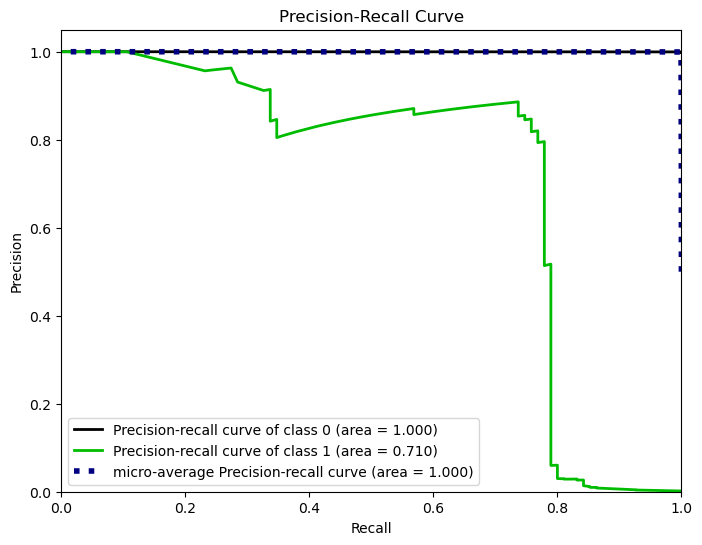

In [536]:
y_pred_proba = rf_fi.predict_proba(X_fi_test)
plot_precision_recall(y_test, y_pred_proba)
plt.show();

In [585]:
rf_fi_f1 = f1_score(y_test, y_pred)
rf_fi_acc = accuracy_score(y_test, y_pred)
rf_fi_prec = precision_score(y_test, y_pred)
rf_fi_recall = recall_score(y_test, y_pred)
rf_fi_auc = roc_auc_score(y_test, y_pred)

In [ ]:
#cross validation

In [ ]:
class_weights = {0:0.50084511,1:10}

In [201]:
operations = [("scaler", scaler),
              ("ran_for_fi", RandomForestClassifier(class_weight=class_weights, min_samples_split = 10,min_samples_leaf=20,
                                                 n_estimators=70,max_depth=3,random_state=42))]
rf_fi = Pipeline(operations)

scores = cross_validate(rf_fi,
                        X_fi_train,
                        y_train,
                        scoring=scoring_metrics,
                        cv = 3,
                        return_train_score=True)
rf_fi_scores = pd.DataFrame(scores)
rf_fi_scores.mean()[2:]

test_precision    0.806
train_precision   0.812
test_recall       0.804
train_recall      0.832
test_f1           0.805
train_f1          0.822
test_roc_auc      0.954
train_roc_auc     0.971
dtype: float64

***v. Apply Model Evaluation Checks***
* link : https://docs.deepchecks.com/stable/user-guide/tabular/auto_quickstarts/plot_quick_model_evaluation.html

In [202]:
operations = [("scaler", scaler),
              ("ran_for_fi", RandomForestClassifier(class_weight=class_weights, min_samples_split = 10,min_samples_leaf=20,
                                                 n_estimators=70,max_depth=3,random_state=42))]

rf_fi = Pipeline(operations)

rf_fi.fit(X_fi_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('ran_for_fi',
                 RandomForestClassifier(class_weight={0: 0.50084511, 1: 10},
                                        max_depth=3, min_samples_leaf=20,
                                        min_samples_split=10, n_estimators=70,
                                        random_state=42))])

In [205]:
from deepchecks.tabular import Dataset
train_ds = Dataset(X_fi_train, label=y_train, cat_features=[])
test_ds = Dataset(X_fi_test, label=y_test, cat_features=[])

In [206]:
from deepchecks.tabular.suites import model_evaluation

evaluation_suite = model_evaluation()
suite_result = evaluation_suite.run(train_ds, test_ds, rf_fi)
# Note: the result can be saved as html using suite_result.save_as_html()
# or exported to json using suite_result.to_json()
suite_result.show()

deepchecks - WARNING - Cannot use model's built-in feature importance on a Scikit-learn Pipeline, using permutation feature importance calculation instead
deepchecks - INFO - Calculating permutation feature importance. Expected to finish in 10 seconds


Accordion(children=(VBox(children=(HTML(value='\n<h1 id="summary_OHZDHRGAV23DHF27O8MG5SBS4">Model Evaluation S…

### XGBoost Classifier with Unbalanced Data Techniques

In [211]:
from xgboost import XGBClassifier

#### SMOTE

***i. Model Training***

In [586]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [212]:
# Define the operations
over = SMOTE(sampling_strategy=0.15, random_state=42)
under = RandomUnderSampler(sampling_strategy=0.15, random_state=42)
scaler = StandardScaler()

In [213]:
scaler = StandardScaler()

In [214]:
operations = [("scaler", scaler),('o', over), ('u', under),
              ("XGB", XGBClassifier(random_state=42))]

# Create a pipeline
xgb = Pipeline(operations)
xgb.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('o', SMOTE(random_state=42, sampling_strategy=0.15)),
                ('u',
                 RandomUnderSampler(random_state=42, sampling_strategy=0.15)),
                ('XGB',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_rounds=None,
                               enable_categorical...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=42, ...))])

***ii. Prediction and Model Evaluating and Tuning***

In [215]:
eval_metric(xgb, X_train, y_train, X_test, y_test)

Test_Set
[[56636    15]
 [   20    75]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.83      0.79      0.81        95

    accuracy                           1.00     56746
   macro avg       0.92      0.89      0.91     56746
weighted avg       1.00      1.00      1.00     56746


Train_Set
[[226602      0]
 [     0    378]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    226602
           1       1.00      1.00      1.00       378

    accuracy                           1.00    226980
   macro avg       1.00      1.00      1.00    226980
weighted avg       1.00      1.00      1.00    226980



In [ ]:
#OPTUNA

In [152]:
over = SMOTE(sampling_strategy=0.15, random_state=42)
under = RandomUnderSampler(sampling_strategy=0.15, random_state=42)
xgb_model = XGBClassifier(random_state=42)

# Create the pipeline
pipeline = Pipeline([("scaler", scaler),
                     ("XGB", xgb_model)
                     ])

In [150]:
# Define an objective function for Optuna
def objective(trial):
    # Define hyperparameters to tune
    xgb_params = {
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.1),
        'n_estimators': trial.suggest_int('n_estimators', 100, 500,100),
        'max_depth': trial.suggest_int('max_depth', 3, 7),
        #'min_child_weight': trial.suggest_int('min_child_weight', 1, 5),
        #'subsample': trial.suggest_float('subsample', 0.5, 1),
        #'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1),
        'gamma': trial.suggest_float('gamma', 0, 1)
    }

    # Set the hyperparameters for the XGBoost model
    xgb_model.set_params(**xgb_params)

    # Fit the pipeline and use cross-validation for optimization
    score = cross_val_score(pipeline, X_train, y_train, cv=5, scoring=make_scorer(f1_score)).mean()

    return score

In [162]:
# Run Optuna optimization
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=5) 

[I 2024-01-12 23:02:22,907] A new study created in memory with name: no-name-10611589-7d15-4c58-a5dc-b9c01d195798
[I 2024-01-12 23:02:31,215] Trial 0 finished with value: 0.6914110206275217 and parameters: {'learning_rate': 0.011289375631456666, 'n_estimators': 200, 'max_depth': 3, 'gamma': 0.2510169100431765}. Best is trial 0 with value: 0.6914110206275217.
[I 2024-01-12 23:02:39,809] Trial 1 finished with value: 0.5961268413960715 and parameters: {'learning_rate': 0.018339048349743186, 'n_estimators': 300, 'max_depth': 3, 'gamma': 0.5303535667631973}. Best is trial 0 with value: 0.6914110206275217.
[I 2024-01-12 23:02:46,401] Trial 2 finished with value: 0.735991339649838 and parameters: {'learning_rate': 0.06030340370109579, 'n_estimators': 100, 'max_depth': 6, 'gamma': 0.7812641566857916}. Best is trial 2 with value: 0.735991339649838.
[I 2024-01-12 23:02:52,546] Trial 3 finished with value: 0.0 and parameters: {'learning_rate': 0.00434314027048901, 'n_estimators': 100, 'max_depth'

[I 2024-01-12 23:11:37,082] Trial 34 finished with value: 0.8001908261994826 and parameters: {'learning_rate': 0.0012543858141169874, 'n_estimators': 400, 'max_depth': 6, 'gamma': 0.635252740484487}. Best is trial 34 with value: 0.8001908261994826.
[I 2024-01-12 23:12:11,866] Trial 35 finished with value: 0.7709898150448989 and parameters: {'learning_rate': 0.002010670020575334, 'n_estimators': 500, 'max_depth': 6, 'gamma': 0.6555731577541746}. Best is trial 34 with value: 0.8001908261994826.
[I 2024-01-12 23:12:32,455] Trial 36 finished with value: 0.796702717417785 and parameters: {'learning_rate': 0.0016471063945846078, 'n_estimators': 300, 'max_depth': 6, 'gamma': 0.643601935972232}. Best is trial 34 with value: 0.8001908261994826.
[I 2024-01-12 23:12:46,902] Trial 37 finished with value: 0.796702717417785 and parameters: {'learning_rate': 0.0012376269605230506, 'n_estimators': 400, 'max_depth': 6, 'gamma': 0.5997681957027037}. Best is trial 34 with value: 0.8001908261994826.
[I 20

[I 2024-01-12 23:28:53,360] Trial 68 finished with value: 0.0 and parameters: {'learning_rate': 0.0011617009928419678, 'n_estimators': 400, 'max_depth': 7, 'gamma': 0.665423783788276}. Best is trial 43 with value: 0.8013439911173157.
[I 2024-01-12 23:29:10,147] Trial 69 finished with value: 0.4564142811776981 and parameters: {'learning_rate': 0.001629743299885919, 'n_estimators': 300, 'max_depth': 6, 'gamma': 0.7965213548903867}. Best is trial 43 with value: 0.8013439911173157.
[I 2024-01-12 23:29:41,419] Trial 70 finished with value: 0.7716917798627002 and parameters: {'learning_rate': 0.002288133659156968, 'n_estimators': 400, 'max_depth': 6, 'gamma': 0.6352527363158275}. Best is trial 43 with value: 0.8013439911173157.
[I 2024-01-12 23:30:16,212] Trial 71 finished with value: 0.0 and parameters: {'learning_rate': 0.0010036319769178926, 'n_estimators': 400, 'max_depth': 6, 'gamma': 0.7804815021384122}. Best is trial 43 with value: 0.8013439911173157.
[I 2024-01-12 23:30:38,981] Trial

[I 2024-01-12 23:44:19,160] Trial 102 finished with value: 0.8024089478274543 and parameters: {'learning_rate': 0.0013251715412211868, 'n_estimators': 400, 'max_depth': 7, 'gamma': 0.9403145650902881}. Best is trial 75 with value: 0.8024089478274543.
[I 2024-01-12 23:44:44,370] Trial 103 finished with value: 0.7807679555468616 and parameters: {'learning_rate': 0.0018757347920216908, 'n_estimators': 400, 'max_depth': 7, 'gamma': 0.9476833098147157}. Best is trial 75 with value: 0.8024089478274543.
[I 2024-01-12 23:45:09,874] Trial 104 finished with value: 0.7895379225102916 and parameters: {'learning_rate': 0.0016698783899140024, 'n_estimators': 400, 'max_depth': 7, 'gamma': 0.8355819643111488}. Best is trial 75 with value: 0.8024089478274543.
[I 2024-01-12 23:45:35,271] Trial 105 finished with value: 0.7968680033214245 and parameters: {'learning_rate': 0.0013973039185796266, 'n_estimators': 400, 'max_depth': 7, 'gamma': 0.8938538703783412}. Best is trial 75 with value: 0.80240894782745

In [163]:
# Get the best parameters and the best model
best_params = study.best_params
#best_model = pipeline.set_params(**best_params)

# Print best parameters
print("Best Parameters:", best_params)

Best Parameters: {'learning_rate': 0.0013371069637443617, 'n_estimators': 400, 'max_depth': 7, 'gamma': 0.8349477032571753}


In [587]:
best_params_xgb = {'learning_rate': 0.0013371069637443617, 'n_estimators': 400, 'max_depth': 7, 'gamma': 0.8349477032571753}

In [229]:
operations = [("scaler", scaler),('o', over), ('u', under),
              ("XGB", XGBClassifier(**best_params_xgb, random_state=42))]

# Create a pipeline
xgb = Pipeline(operations)
xgb.fit(X_train, y_train)
eval_metric(xgb, X_train, y_train, X_test, y_test)

Test_Set
[[56639    12]
 [   29    66]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.85      0.69      0.76        95

    accuracy                           1.00     56746
   macro avg       0.92      0.85      0.88     56746
weighted avg       1.00      1.00      1.00     56746


Train_Set
[[226560     42]
 [    70    308]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    226602
           1       0.88      0.81      0.85       378

    accuracy                           1.00    226980
   macro avg       0.94      0.91      0.92    226980
weighted avg       1.00      1.00      1.00    226980



**There is overfitting!**

In [228]:
operations = [("scaler", scaler),('o', over), ('u', under),
              ("XGB", XGBClassifier(learning_rate=0.0033371069637443617,
                                    n_estimators=400,max_depth=6,
                                    gamma=0.8349477032571753,
                                    random_state=42))]

xgb = Pipeline(operations)
xgb.fit(X_train, y_train)
eval_metric(xgb, X_train, y_train, X_test, y_test)

Test_Set
[[56629    22]
 [   26    69]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.76      0.73      0.74        95

    accuracy                           1.00     56746
   macro avg       0.88      0.86      0.87     56746
weighted avg       1.00      1.00      1.00     56746


Train_Set
[[226527     75]
 [    42    336]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    226602
           1       0.82      0.89      0.85       378

    accuracy                           1.00    226980
   macro avg       0.91      0.94      0.93    226980
weighted avg       1.00      1.00      1.00    226980



#### Feature Importance for XGB with SMOTE

In [234]:
importances = xgb.named_steps['XGB'].feature_importances_

feat_imp_xgb = pd.DataFrame({'Feature':X_train.columns,  
                         'Importance':importances})

feat_imp_xgb.sort_values(by='Importance', ascending=False, inplace=True)

feat_imp_xgb

,Feature,Importance
14,V14,0.747
17,V17,0.042
10,V10,0.023
4,V4,0.018
27,V27,0.018
9,V9,0.013
25,V25,0.011
29,Amount,0.011
8,V8,0.010
15,V15,0.010


In [588]:
important_feats = ['V14', 'V17', 'V10', 'V4', 'V27', 'V9', 'V25', 'Amount']

In [589]:
X_fi = df[important_feats]

In [590]:
X_fi_train, X_fi_test, y_train, y_test = train_test_split(X_fi, y, test_size=0.2, stratify=y, random_state=42)

In [591]:
operations = [("scaler", scaler),('o', over), ('u', under),
              ("XGB", XGBClassifier(learning_rate=0.0033371069637443617,
                                    n_estimators=150,max_depth=5,
                                    gamma=0.8349477032571753,
                                    random_state=42))]

xgb_fi = Pipeline(operations)
xgb_fi.fit(X_fi_train, y_train)
eval_metric(xgb_fi, X_fi_train, y_train, X_fi_test, y_test)

Test_Set
[[56055   596]
 [   17    78]]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     56651
           1       0.12      0.82      0.20        95

    accuracy                           0.99     56746
   macro avg       0.56      0.91      0.60     56746
weighted avg       1.00      0.99      0.99     56746


Train_Set
[[224166   2436]
 [    33    345]]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99    226602
           1       0.12      0.91      0.22       378

    accuracy                           0.99    226980
   macro avg       0.56      0.95      0.61    226980
weighted avg       1.00      0.99      0.99    226980



In [592]:
y_pred = xgb_fi.predict(X_fi_test)
precision_score(y_test, y_pred)

0.11572700296735905

In [593]:
xgb_smote_fi_f1 = f1_score(y_test, y_pred)
xgb_smote_fi_acc = accuracy_score(y_test, y_pred)
xgb_smote_fi_prec = precision_score(y_test, y_pred)
xgb_smote_fi_recall = recall_score(y_test, y_pred)
xgb_smote_fi_auc = roc_auc_score(y_test, y_pred)

In [ ]:
#cross validation

In [254]:
operations = [("scaler", scaler),('o', over), ('u', under),
              ("XGB", XGBClassifier(learning_rate=0.0033371069637443617,
                                    n_estimators=150,max_depth=5,
                                    gamma=0.8349477032571753,
                                    random_state=42))]


# Create a pipeline
xgb_model = Pipeline(operations)

scores = cross_validate(xgb_model,
                        X_fi_train,
                        y_train,
                        scoring=scoring_metrics,
                        cv = 5,
                        return_train_score=True)
xgb_fi_smote = pd.DataFrame(scores)
xgb_fi_smote.mean()[2:]

test_precision    0.848
train_precision   0.849
test_recall       0.778
train_recall      0.795
test_f1           0.810
train_f1          0.821
test_roc_auc      0.963
train_roc_auc     0.984
dtype: float64

***iii. Plot Precision and Recall Curve***


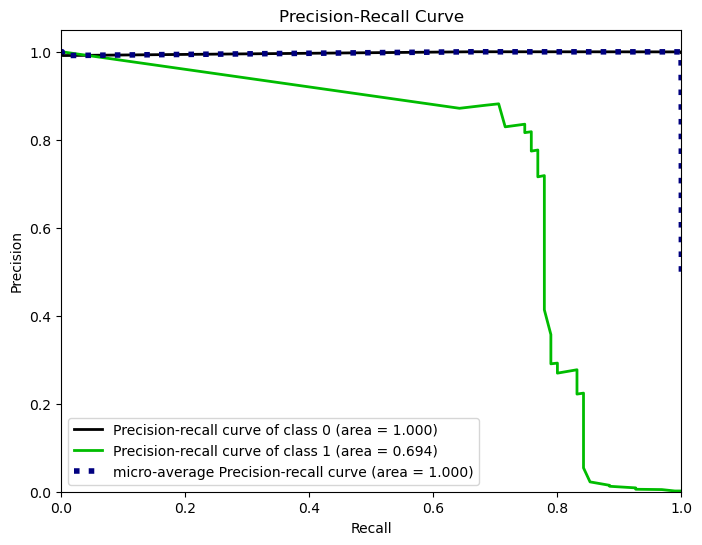

In [256]:
y_pred_proba = xgb_fi.predict_proba(X_fi_test)
plot_precision_recall(y_test, y_pred_proba)
plt.show();

In [255]:
operations = [("scaler", scaler),('o', over), ('u', under),
              ("XGB", XGBClassifier(learning_rate=0.0033371069637443617,
                                    n_estimators=150,max_depth=5,
                                    gamma=0.8349477032571753,
                                    random_state=42))]

xgb_fi = Pipeline(operations)
xgb_fi.fit(X_fi_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('o', SMOTE(random_state=42, sampling_strategy=0.15)),
                ('u',
                 RandomUnderSampler(random_state=42, sampling_strategy=0.15)),
                ('XGB',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_rounds=None,
                               enable_categorical...
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None,
                               learning_rate=0.0033371069637443615,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=5, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=150, n_jobs=None,
                               num_parallel_tree=None, random_state=42, ...))])

***v. Apply Model Evaluation Checks***
* link : https://docs.deepchecks.com/stable/user-guide/tabular/auto_quickstarts/plot_quick_model_evaluation.html

In [594]:
X_fi_train, X_fi_test, y_train, y_test = train_test_split(X_fi, y, test_size=0.2, stratify=y, random_state=42)

In [258]:
from deepchecks.tabular import Dataset
train_ds = Dataset(X_fi_train, label=y_train, cat_features=[])
test_ds = Dataset(X_fi_test, label=y_test, cat_features=[])

In [259]:
from deepchecks.tabular.suites import model_evaluation

evaluation_suite = model_evaluation()
suite_result = evaluation_suite.run(train_ds, test_ds, xgb_fi)
# Note: the result can be saved as html using suite_result.save_as_html()
# or exported to json using suite_result.to_json()
suite_result.show()

deepchecks - WARNING - Cannot use model's built-in feature importance on a Scikit-learn Pipeline, using permutation feature importance calculation instead
deepchecks - INFO - Calculating permutation feature importance. Expected to finish in 6 seconds


Accordion(children=(VBox(children=(HTML(value='\n<h1 id="summary_AHTMIQVOZYA6NM9PKAF4M9ATZ">Model Evaluation S…

#### XGB with class weight

In [260]:
class_weights = {0:0.50084511,1:10}

In [595]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [270]:
operations = [("scaler", scaler),
              ("XGB", XGBClassifier(learning_rate=0.003371069637443617,
                                    class_weight=class_weights,
                                    n_estimators=400,max_depth=6,
                                    gamma=0.8349477032571753,
                                    random_state=42))]

xgb = Pipeline(operations)
xgb.fit(X_train, y_train)
eval_metric(xgb, X_train, y_train, X_test, y_test)

Test_Set
[[56649     2]
 [   29    66]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.97      0.69      0.81        95

    accuracy                           1.00     56746
   macro avg       0.99      0.85      0.90     56746
weighted avg       1.00      1.00      1.00     56746


Train_Set
[[226588     14]
 [    71    307]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    226602
           1       0.96      0.81      0.88       378

    accuracy                           1.00    226980
   macro avg       0.98      0.91      0.94    226980
weighted avg       1.00      1.00      1.00    226980



**There is overfitting**

#### Feature Importance for XGB with Class Weight

In [263]:
importances = xgb.named_steps['XGB'].feature_importances_

feat_imp = pd.DataFrame({'Feature':X_train.columns,  
                         'Importance':importances})

feat_imp.sort_values(by='Importance', ascending=False, inplace=True)

feat_imp

,Feature,Importance
14,V14,0.624
10,V10,0.174
7,V7,0.034
12,V12,0.033
26,V26,0.014
27,V27,0.012
17,V17,0.011
8,V8,0.007
5,V5,0.007
11,V11,0.007


In [596]:
important_feats = ['V14', 'V10', 'V7', 'V12']

In [597]:
X_fi = df[important_feats]

In [598]:
X_fi_train, X_fi_test, y_train, y_test = train_test_split(X_fi, y, test_size=0.2, stratify=y, random_state=42)

In [599]:
operations = [("scaler", scaler),
              ("XGB", XGBClassifier(learning_rate=0.003371069637443617,
                                    class_weight=class_weights,
                                    n_estimators=300,max_depth=5,
                                    gamma=0.8349477032571753,
                                    random_state=42))]

xgb_fi_cw = Pipeline(operations)
xgb_fi_cw.fit(X_fi_train, y_train)
eval_metric(xgb_fi_cw, X_fi_train, y_train, X_fi_test, y_test)

Test_Set
[[56641    10]
 [   31    64]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.86      0.67      0.76        95

    accuracy                           1.00     56746
   macro avg       0.93      0.84      0.88     56746
weighted avg       1.00      1.00      1.00     56746


Train_Set
[[226563     39]
 [    95    283]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    226602
           1       0.88      0.75      0.81       378

    accuracy                           1.00    226980
   macro avg       0.94      0.87      0.90    226980
weighted avg       1.00      1.00      1.00    226980



In [600]:
y_pred = xgb_fi_cw.predict(X_fi_test)
precision_score(y_test, y_pred)

0.8648648648648649

In [601]:
xgb_cw_fi_f1 = f1_score(y_test, y_pred)
xgb_cw_fi_acc = accuracy_score(y_test, y_pred)
xgb_cw_fi_prec = precision_score(y_test, y_pred)
xgb_cw_fi_recall = recall_score(y_test, y_pred)
xgb_cw_fi_auc = roc_auc_score(y_test, y_pred)

In [ ]:
#cross validatin

In [508]:
operations = [("scaler", scaler),
              ("XGB", XGBClassifier(learning_rate=0.003371069637443617,
                                    class_weight=class_weights,
                                    n_estimators=300,max_depth=5,
                                    gamma=0.8349477032571753,
                                    random_state=42))]


# Create a pipeline
xgb_model = Pipeline(operations)

scores = cross_validate(xgb_model,
                        X_fi_train,
                        y_train,
                        scoring=scoring_metrics,
                        cv = 5,
                        return_train_score=True)
xgb_fi_cw = pd.DataFrame(scores)
xgb_fi_cw.mean()[2:]

test_precision    0.861
train_precision   0.876
test_recall       0.725
train_recall      0.749
test_f1           0.787
train_f1          0.808
test_roc_auc      0.923
train_roc_auc     0.922
dtype: float64

***Apply Model Evaluation Checks***

In [318]:
operations = [("scaler", scaler),
              ("XGB", XGBClassifier(learning_rate=0.003371069637443617,
                                    class_weight=class_weights,
                                    n_estimators=300,max_depth=5,
                                    gamma=0.8349477032571753,
                                    random_state=42))]

xgb_fi_cw = Pipeline(operations)
xgb_fi_cw.fit(X_fi_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('XGB',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               class_weight={0: 0.50084511, 1: 10},
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=0.8349477032571753,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None,
                               learning_rate=0.003371069637443617, max_bin=None,
                               max_cat_threshold=None, max_cat_to_onehot=None,
                               max_delta_step=None, max_depth=5,
                               max_leaves=None, min_child_weight=None,
                               missing=nan, monotone_constraints=None,
                               multi_strategy=None, n_estimators=300,
                               n_jobs=None, num_parallel_tree=None, ...))])

In [319]:
X_fi_train, X_fi_test, y_train, y_test = train_test_split(X_fi, y, test_size=0.2, stratify=y, random_state=42)

In [320]:
from deepchecks.tabular import Dataset
train_ds = Dataset(X_fi_train, label=y_train, cat_features=[])
test_ds = Dataset(X_fi_test, label=y_test, cat_features=[])

In [321]:
from deepchecks.tabular.suites import model_evaluation

evaluation_suite = model_evaluation()
suite_result = evaluation_suite.run(train_ds, test_ds, xgb_fi_cw)
# Note: the result can be saved as html using suite_result.save_as_html()
# or exported to json using suite_result.to_json()
suite_result.show()

deepchecks - WARNING - Cannot use model's built-in feature importance on a Scikit-learn Pipeline, using permutation feature importance calculation instead
deepchecks - INFO - Calculating permutation feature importance. Expected to finish in 3 seconds


Accordion(children=(VBox(children=(HTML(value='\n<h1 id="summary_2BKEMN3ORV0P4MU1V79KNLH0K">Model Evaluation S…

### Neural Network

In the final step, you will make classification with Neural Network which is a Deep Learning algorithm. 

Neural networks are a series of algorithms that mimic the operations of a human brain to recognize relationships between vast amounts of data. They are used in a variety of applications in financial services, from forecasting and marketing research to fraud detection and risk assessment.

A neural network contains layers of interconnected nodes. Each node is a perceptron and is similar to a multiple linear regression. The perceptron feeds the signal produced by a multiple linear regression into an activation function that may be nonlinear.

In a multi-layered perceptron (MLP), perceptrons are arranged in interconnected layers. The input layer collects input patterns. The output layer has classifications or output signals to which input patterns may map. 

Hidden layers fine-tune the input weightings until the neural network’s margin of error is minimal. It is hypothesized that hidden layers extrapolate salient features in the input data that have predictive power regarding the outputs.

You will discover **[how to create](https://towardsdatascience.com/building-our-first-neural-network-in-keras-bdc8abbc17f5)** your deep learning neural network model in Python using **[Keras](https://keras.io/about/)**. Keras is a powerful and easy-to-use free open source Python library for developing and evaluating deep learning models.

- The steps you are going to cover for this algorithm are as follows:

   *i. Import Libraries*
   
   *ii. Define Model*
    
   *iii. Compile Model*
   
   *iv. Fit Model*
   
   *v. Prediction and Model Evaluating*
   
   *vi. Plot Precision and Recall Curve*

***i. Import Libraries***

In [475]:
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import f1_score, recall_score
from tensorflow.keras.metrics import Recall
from keras.regularizers import l2

***ii. Define Model***

In [603]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)
#validation_split=0.1 balanced data
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, stratify=y_train, test_size=0.2, random_state=42)

In [ ]:
#######################

In [604]:
# Preprocessing steps  
scaler = StandardScaler()
                     
scaler.fit(X_train, y_train) 

# Transform training data 
scaler.transform(X_train)

# Transform other splits
X_train_scaled = scaler.transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [440]:
# use keras metrics, not sklearn metrics!

In [490]:
model = Sequential()
model.add(Dense(64, input_dim=X_train_scaled.shape[1], activation='relu',kernel_regularizer=l2(0.05)))
model.add(BatchNormalization())
model.add(Dropout(0.4))
model.add(Dense(32, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(16, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=[Recall(name='recall')])

In [491]:
early_stop1 = EarlyStopping(monitor = "recall", mode = "max", verbose = 1, patience = 5,restore_best_weights=True)
model.fit(x=X_train_scaled, y=y_train, epochs=60, batch_size=128, validation_data=(X_val_scaled, y_val),callbacks = [early_stop1], verbose=1)

Epoch 1/60
1419/1419 [==============================] - 5s 3ms/step - loss: 0.2984 - recall: 0.4073 - val_loss: 0.0160 - val_recall: 0.8289
Epoch 2/60
1419/1419 [==============================] - 4s 3ms/step - loss: 0.0146 - recall: 0.5000 - val_loss: 0.0130 - val_recall: 0.8421
Epoch 3/60
1419/1419 [==============================] - 4s 3ms/step - loss: 0.0116 - recall: 0.5033 - val_loss: 0.0098 - val_recall: 0.8421
Epoch 4/60
1419/1419 [==============================] - 4s 3ms/step - loss: 0.0098 - recall: 0.5000 - val_loss: 0.0127 - val_recall: 0.8421
Epoch 5/60
1419/1419 [==============================] - 4s 3ms/step - loss: 0.0094 - recall: 0.5364 - val_loss: 0.0083 - val_recall: 0.7763
Epoch 6/60
1419/1419 [==============================] - 4s 3ms/step - loss: 0.0090 - recall: 0.5331 - val_loss: 0.0122 - val_recall: 0.8684
Epoch 7/60
1419/1419 [==============================] - 4s 3ms/step - loss: 0.0083 - recall: 0.5464 - val_loss: 0.0086 - val_recall: 0.8421
Epoch 8/60
1419/1419

In [492]:
# Evaluate the model on the test set
y_pred_proba = model.predict(X_test_scaled)
y_pred = (y_pred_proba >= 0.5).astype(int)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test, y_pred))

1774/1774 [==============================] - 2s 958us/step
[[56639    12]
 [   24    71]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.86      0.75      0.80        95

    accuracy                           1.00     56746
   macro avg       0.93      0.87      0.90     56746
weighted avg       1.00      1.00      1.00     56746



In [493]:
y_pred_proba2 = model.predict(X_train_scaled)
y_pred2 = (y_pred_proba2 >= 0.5).astype(int)
print(confusion_matrix(y_train,y_pred2))
print(classification_report(y_train, y_pred2))

5675/5675 [==============================] - 6s 1ms/step
[[181228     54]
 [    64    238]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    181282
           1       0.82      0.79      0.80       302

    accuracy                           1.00    181584
   macro avg       0.91      0.89      0.90    181584
weighted avg       1.00      1.00      1.00    181584



***Plot Precision and Recall Curve***

In [445]:
from sklearn.metrics import roc_curve, precision_recall_curve, auc

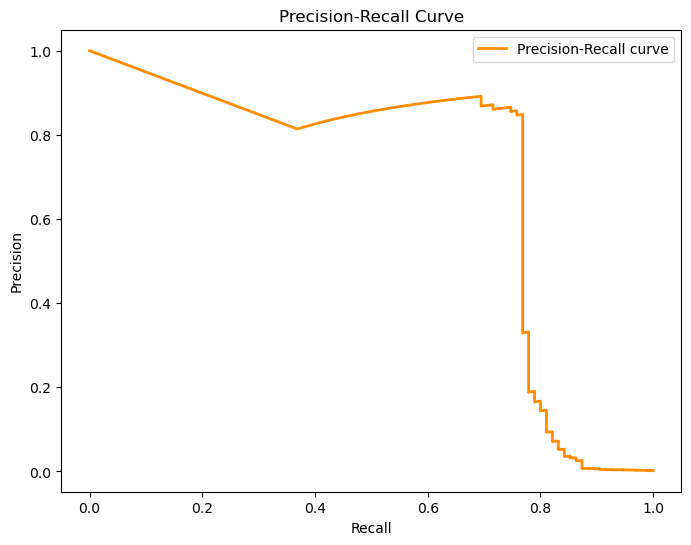

In [494]:
# Plot Precision-Recall curve
precision, recall, thresholds_pr = precision_recall_curve(y_test, y_pred_proba)

plt.plot(recall, precision, color='darkorange', lw=2, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="upper right")
plt.show()

In [ ]:
#Hyperparameter Tuning with OPTUNA

In [448]:
# Define the objective function for Optuna
def objective(trial):
    # Define the model
    model = Sequential()
    model.add(Dense(trial.suggest_int('units1', 32, 256), input_dim=X_train_scaled.shape[1], activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(trial.suggest_float('dropout1', 0.2, 0.5)))
    model.add(Dense(trial.suggest_int('units2', 16, 128), activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(trial.suggest_float('dropout2', 0.2, 0.5)))
    model.add(Dense(1, activation='sigmoid'))

    # Compile the model
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=[Recall(name='recall')])

    # Early stopping callback
    early_stop = EarlyStopping(monitor='recall', mode='max', verbose=1, patience=5, restore_best_weights=True)

    # Train the model
    model.fit(x=X_train_scaled, y=y_train, epochs=60, batch_size=64, validation_data=(X_val_scaled, y_val),
              callbacks=[early_stop], verbose=1)

    # Evaluate the model on the validation set
    _, recall = model.evaluate(X_val_scaled, y_val)
    
    return recall

In [449]:
# Create a study object and optimize the objective function
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=10)

[I 2024-01-16 14:51:10,107] A new study created in memory with name: no-name-a3550066-1121-41e0-8f1d-034c96501c41


Epoch 1/60
2838/2838 [==============================] - 8s 3ms/step - loss: 0.0583 - recall: 0.6325 - val_loss: 0.0042 - val_recall: 0.8421
Epoch 2/60
2838/2838 [==============================] - 8s 3ms/step - loss: 0.0051 - recall: 0.6457 - val_loss: 0.0050 - val_recall: 0.8553
Epoch 3/60
2838/2838 [==============================] - 8s 3ms/step - loss: 0.0042 - recall: 0.6424 - val_loss: 0.0031 - val_recall: 0.8158
Epoch 4/60
2838/2838 [==============================] - 8s 3ms/step - loss: 0.0038 - recall: 0.6192 - val_loss: 0.0046 - val_recall: 0.8421
Epoch 5/60
2838/2838 [==============================] - 8s 3ms/step - loss: 0.0035 - recall: 0.6821 - val_loss: 0.0028 - val_recall: 0.8421
Epoch 6/60
2838/2838 [==============================] - 8s 3ms/step - loss: 0.0031 - recall: 0.7020 - val_loss: 0.0039 - val_recall: 0.8553
Epoch 7/60
2838/2838 [==============================] - 8s 3ms/step - loss: 0.0030 - recall: 0.7219 - val_loss: 0.0035 - val_recall: 0.8421
Epoch 8/60
2838/2838

[I 2024-01-16 14:58:07,964] Trial 0 finished with value: 0.8157894611358643 and parameters: {'units1': 188, 'dropout1': 0.20390258339237424, 'units2': 52, 'dropout2': 0.4344839585541659}. Best is trial 0 with value: 0.8157894611358643.


Epoch 1/60
2838/2838 [==============================] - 10s 3ms/step - loss: 0.0490 - recall: 0.6026 - val_loss: 0.0062 - val_recall: 0.8421
Epoch 2/60
2838/2838 [==============================] - 9s 3ms/step - loss: 0.0051 - recall: 0.6490 - val_loss: 0.0032 - val_recall: 0.8421
Epoch 3/60
2838/2838 [==============================] - 9s 3ms/step - loss: 0.0042 - recall: 0.6821 - val_loss: 0.0036 - val_recall: 0.8421
Epoch 4/60
2838/2838 [==============================] - 9s 3ms/step - loss: 0.0037 - recall: 0.6523 - val_loss: 0.0046 - val_recall: 0.8421
Epoch 5/60
2838/2838 [==============================] - 9s 3ms/step - loss: 0.0037 - recall: 0.6755 - val_loss: 0.0031 - val_recall: 0.8421
Epoch 6/60
2838/2838 [==============================] - 9s 3ms/step - loss: 0.0032 - recall: 0.7119 - val_loss: 0.0043 - val_recall: 0.8553
Epoch 7/60
2838/2838 [==============================] - 10s 4ms/step - loss: 0.0030 - recall: 0.7152 - val_loss: 0.0038 - val_recall: 0.8421
Epoch 8/60
2838/28

[I 2024-01-16 15:03:52,557] Trial 1 finished with value: 0.8421052694320679 and parameters: {'units1': 188, 'dropout1': 0.24318376619520232, 'units2': 109, 'dropout2': 0.49144269485192926}. Best is trial 1 with value: 0.8421052694320679.


Epoch 1/60
2838/2838 [==============================] - 10s 3ms/step - loss: 0.0551 - recall: 0.5695 - val_loss: 0.0045 - val_recall: 0.8158
Epoch 2/60
2838/2838 [==============================] - 9s 3ms/step - loss: 0.0055 - recall: 0.6159 - val_loss: 0.0046 - val_recall: 0.8553
Epoch 3/60
2838/2838 [==============================] - 9s 3ms/step - loss: 0.0042 - recall: 0.6523 - val_loss: 0.0034 - val_recall: 0.8553
Epoch 4/60
2838/2838 [==============================] - 8s 3ms/step - loss: 0.0040 - recall: 0.6291 - val_loss: 0.0041 - val_recall: 0.8553
Epoch 5/60
2838/2838 [==============================] - 8s 3ms/step - loss: 0.0035 - recall: 0.6755 - val_loss: 0.0032 - val_recall: 0.8421
Epoch 6/60
2838/2838 [==============================] - 9s 3ms/step - loss: 0.0034 - recall: 0.6887 - val_loss: 0.0043 - val_recall: 0.8553
Epoch 7/60
2838/2838 [==============================] - 8s 3ms/step - loss: 0.0033 - recall: 0.6788 - val_loss: 0.0036 - val_recall: 0.8553
Epoch 8/60
2838/283

[I 2024-01-16 15:07:20,890] Trial 2 finished with value: 0.8421052694320679 and parameters: {'units1': 70, 'dropout1': 0.2460877298748816, 'units2': 78, 'dropout2': 0.4801531632240306}. Best is trial 1 with value: 0.8421052694320679.


Epoch 1/60
2838/2838 [==============================] - 10s 3ms/step - loss: 0.0486 - recall: 0.6060 - val_loss: 0.0055 - val_recall: 0.8421
Epoch 2/60
2838/2838 [==============================] - 9s 3ms/step - loss: 0.0049 - recall: 0.6457 - val_loss: 0.0049 - val_recall: 0.8684
Epoch 3/60
2838/2838 [==============================] - 8s 3ms/step - loss: 0.0040 - recall: 0.6523 - val_loss: 0.0038 - val_recall: 0.8026
Epoch 4/60
2838/2838 [==============================] - 8s 3ms/step - loss: 0.0035 - recall: 0.6722 - val_loss: 0.0049 - val_recall: 0.8421
Epoch 5/60
2838/2838 [==============================] - 8s 3ms/step - loss: 0.0034 - recall: 0.6755 - val_loss: 0.0031 - val_recall: 0.8421
Epoch 6/60
2838/2838 [==============================] - 8s 3ms/step - loss: 0.0031 - recall: 0.7020 - val_loss: 0.0047 - val_recall: 0.8553
Epoch 7/60
2838/2838 [==============================] - 8s 3ms/step - loss: 0.0030 - recall: 0.7086 - val_loss: 0.0038 - val_recall: 0.8553
Epoch 8/60
2838/283

[I 2024-01-16 15:10:58,601] Trial 3 finished with value: 0.8289473652839661 and parameters: {'units1': 128, 'dropout1': 0.39816172906210046, 'units2': 52, 'dropout2': 0.24699317376403218}. Best is trial 1 with value: 0.8421052694320679.


Epoch 1/60
2838/2838 [==============================] - 10s 3ms/step - loss: 0.0487 - recall: 0.5927 - val_loss: 0.0042 - val_recall: 0.8289
Epoch 2/60
2838/2838 [==============================] - 9s 3ms/step - loss: 0.0050 - recall: 0.6490 - val_loss: 0.0051 - val_recall: 0.8421
Epoch 3/60
2838/2838 [==============================] - 9s 3ms/step - loss: 0.0045 - recall: 0.6325 - val_loss: 0.0045 - val_recall: 0.8421
Epoch 4/60
2838/2838 [==============================] - 9s 3ms/step - loss: 0.0038 - recall: 0.6490 - val_loss: 0.0050 - val_recall: 0.8421
Epoch 5/60
2838/2838 [==============================] - 9s 3ms/step - loss: 0.0034 - recall: 0.6887 - val_loss: 0.0042 - val_recall: 0.8421
Epoch 6/60
2838/2838 [==============================] - 8s 3ms/step - loss: 0.0032 - recall: 0.6821 - val_loss: 0.0058 - val_recall: 0.8684
Epoch 7/60
2838/2838 [==============================] - 9s 3ms/step - loss: 0.0032 - recall: 0.7053 - val_loss: 0.0043 - val_recall: 0.8553
Epoch 8/60
2838/283

[I 2024-01-16 15:14:37,916] Trial 4 finished with value: 0.8552631735801697 and parameters: {'units1': 181, 'dropout1': 0.4315480158357961, 'units2': 77, 'dropout2': 0.37361428078456915}. Best is trial 4 with value: 0.8552631735801697.


Epoch 1/60
2838/2838 [==============================] - 10s 3ms/step - loss: 0.0536 - recall: 0.5861 - val_loss: 0.0048 - val_recall: 0.8289
Epoch 2/60
2838/2838 [==============================] - 9s 3ms/step - loss: 0.0045 - recall: 0.6887 - val_loss: 0.0044 - val_recall: 0.8553
Epoch 3/60
2838/2838 [==============================] - 8s 3ms/step - loss: 0.0041 - recall: 0.6457 - val_loss: 0.0039 - val_recall: 0.8553
Epoch 4/60
2838/2838 [==============================] - 9s 3ms/step - loss: 0.0036 - recall: 0.6623 - val_loss: 0.0062 - val_recall: 0.8553
Epoch 5/60
2838/2838 [==============================] - 9s 3ms/step - loss: 0.0035 - recall: 0.6755 - val_loss: 0.0044 - val_recall: 0.8421
Epoch 6/60
2838/2838 [==============================] - 8s 3ms/step - loss: 0.0034 - recall: 0.6821 - val_loss: 0.0061 - val_recall: 0.8684
Epoch 7/60
2838/2838 [==============================] - 8s 3ms/step - loss: 0.0033 - recall: 0.7086 - val_loss: 0.0041 - val_recall: 0.8421
Epoch 8/60
2838/283

[I 2024-01-16 15:17:22,360] Trial 5 finished with value: 0.8421052694320679 and parameters: {'units1': 185, 'dropout1': 0.4728785369937233, 'units2': 40, 'dropout2': 0.24827484296890057}. Best is trial 4 with value: 0.8552631735801697.


Epoch 1/60
2838/2838 [==============================] - 9s 3ms/step - loss: 0.0433 - recall: 0.5894 - val_loss: 0.0037 - val_recall: 0.8289
Epoch 2/60
2838/2838 [==============================] - 8s 3ms/step - loss: 0.0048 - recall: 0.6457 - val_loss: 0.0055 - val_recall: 0.8684
Epoch 3/60
2838/2838 [==============================] - 8s 3ms/step - loss: 0.0045 - recall: 0.6523 - val_loss: 0.0045 - val_recall: 0.8289
Epoch 4/60
2838/2838 [==============================] - 8s 3ms/step - loss: 0.0038 - recall: 0.6457 - val_loss: 0.0057 - val_recall: 0.8553
Epoch 5/60
2838/2838 [==============================] - 8s 3ms/step - loss: 0.0035 - recall: 0.6821 - val_loss: 0.0039 - val_recall: 0.8553
Epoch 6/60
2838/2838 [==============================] - 8s 3ms/step - loss: 0.0033 - recall: 0.6954 - val_loss: 0.0049 - val_recall: 0.8553
Epoch 7/60
2838/2838 [==============================] - 8s 3ms/step - loss: 0.0031 - recall: 0.7020 - val_loss: 0.0037 - val_recall: 0.8553
Epoch 8/60
2838/2838

[I 2024-01-16 15:20:58,738] Trial 6 finished with value: 0.8552631735801697 and parameters: {'units1': 88, 'dropout1': 0.38277214605718013, 'units2': 76, 'dropout2': 0.2687233997302613}. Best is trial 4 with value: 0.8552631735801697.


Epoch 1/60
2838/2838 [==============================] - 10s 3ms/step - loss: 0.0418 - recall: 0.4834 - val_loss: 0.0061 - val_recall: 0.8289
Epoch 2/60
2838/2838 [==============================] - 9s 3ms/step - loss: 0.0054 - recall: 0.6325 - val_loss: 0.0045 - val_recall: 0.8421
Epoch 3/60
2838/2838 [==============================] - 9s 3ms/step - loss: 0.0047 - recall: 0.5993 - val_loss: 0.0047 - val_recall: 0.8421
Epoch 4/60
2838/2838 [==============================] - 8s 3ms/step - loss: 0.0043 - recall: 0.6325 - val_loss: 0.0046 - val_recall: 0.8421
Epoch 5/60
2838/2838 [==============================] - 8s 3ms/step - loss: 0.0038 - recall: 0.6523 - val_loss: 0.0040 - val_recall: 0.8421
Epoch 6/60
2838/2838 [==============================] - 8s 3ms/step - loss: 0.0038 - recall: 0.6689 - val_loss: 0.0044 - val_recall: 0.8553
Epoch 7/60
2838/2838 [==============================] - 7s 3ms/step - loss: 0.0035 - recall: 0.6821 - val_loss: 0.0035 - val_recall: 0.8421
Epoch 8/60
2838/283

[I 2024-01-16 15:23:49,169] Trial 7 finished with value: 0.8552631735801697 and parameters: {'units1': 37, 'dropout1': 0.3893797140973909, 'units2': 105, 'dropout2': 0.3189256084680635}. Best is trial 4 with value: 0.8552631735801697.


Epoch 1/60
2838/2838 [==============================] - 9s 3ms/step - loss: 0.0453 - recall: 0.5960 - val_loss: 0.0048 - val_recall: 0.8421
Epoch 2/60
2838/2838 [==============================] - 8s 3ms/step - loss: 0.0045 - recall: 0.6391 - val_loss: 0.0039 - val_recall: 0.8553
Epoch 3/60
2838/2838 [==============================] - 8s 3ms/step - loss: 0.0039 - recall: 0.6854 - val_loss: 0.0047 - val_recall: 0.8289
Epoch 4/60
2838/2838 [==============================] - 8s 3ms/step - loss: 0.0035 - recall: 0.7020 - val_loss: 0.0043 - val_recall: 0.8684
Epoch 5/60
2838/2838 [==============================] - 9s 3ms/step - loss: 0.0033 - recall: 0.6887 - val_loss: 0.0037 - val_recall: 0.8421
Epoch 6/60
2838/2838 [==============================] - 9s 3ms/step - loss: 0.0030 - recall: 0.7053 - val_loss: 0.0044 - val_recall: 0.8421
Epoch 7/60
2838/2838 [==============================] - 8s 3ms/step - loss: 0.0029 - recall: 0.7185 - val_loss: 0.0032 - val_recall: 0.8421
Epoch 8/60
2838/2838

[I 2024-01-16 15:27:29,362] Trial 8 finished with value: 0.8421052694320679 and parameters: {'units1': 80, 'dropout1': 0.21737589574962984, 'units2': 75, 'dropout2': 0.31070438369428294}. Best is trial 4 with value: 0.8552631735801697.


Epoch 1/60
2838/2838 [==============================] - 10s 3ms/step - loss: 0.0367 - recall: 0.6291 - val_loss: 0.0068 - val_recall: 0.8421
Epoch 2/60
2838/2838 [==============================] - 8s 3ms/step - loss: 0.0052 - recall: 0.6457 - val_loss: 0.0067 - val_recall: 0.8553
Epoch 3/60
2838/2838 [==============================] - 9s 3ms/step - loss: 0.0040 - recall: 0.6854 - val_loss: 0.0049 - val_recall: 0.8289
Epoch 4/60
2838/2838 [==============================] - 9s 3ms/step - loss: 0.0034 - recall: 0.6921 - val_loss: 0.0053 - val_recall: 0.8421
Epoch 5/60
2838/2838 [==============================] - 9s 3ms/step - loss: 0.0032 - recall: 0.6987 - val_loss: 0.0035 - val_recall: 0.8421
Epoch 6/60
2838/2838 [==============================] - 9s 3ms/step - loss: 0.0028 - recall: 0.7086 - val_loss: 0.0054 - val_recall: 0.8553
Epoch 7/60
2838/2838 [==============================] - 8s 3ms/step - loss: 0.0028 - recall: 0.7152 - val_loss: 0.0030 - val_recall: 0.8553
Epoch 8/60
2838/283

[I 2024-01-16 15:32:11,170] Trial 9 finished with value: 0.8421052694320679 and parameters: {'units1': 133, 'dropout1': 0.22091495977187983, 'units2': 115, 'dropout2': 0.22937374870785285}. Best is trial 4 with value: 0.8552631735801697.


In [450]:
# Get the best hyperparameters
best_params = study.best_params
best_units1 = best_params['units1']
best_dropout1 = best_params['dropout1']
best_units2 = best_params['units2']
best_dropout2 = best_params['dropout2']
print(best_params)

{'units1': 181, 'dropout1': 0.4315480158357961, 'units2': 77, 'dropout2': 0.37361428078456915}


In [455]:
#{'units1': 181, 'dropout1': 0.4315480158357961, 'units2': 77, 'dropout2': 0.37361428078456915}

In [457]:
model2 = Sequential()

model2.add(Dense(best_units1, input_dim=X_train_scaled.shape[1], activation='relu'))
model2.add(BatchNormalization())
model2.add(Dropout(best_dropout1))

model2.add(Dense(best_units2, activation='relu'))
model2.add(BatchNormalization())
model2.add(Dropout(best_dropout2))

model2.add(Dense(1, activation='sigmoid'))

model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=[Recall(name='recall')])

In [460]:
early_stop1 = EarlyStopping(monitor = "recall", mode = "max", verbose = 1, patience = 10,restore_best_weights=True)

In [461]:
model2.fit(x=X_train_scaled, y=y_train, epochs=60, batch_size=64, validation_data=(X_val_scaled, y_val),callbacks=[early_stop1], verbose=1)

Epoch 1/60
2838/2838 [==============================] - 10s 3ms/step - loss: 0.0485 - recall: 0.6159 - val_loss: 0.0052 - val_recall: 0.8289
Epoch 2/60
2838/2838 [==============================] - 10s 3ms/step - loss: 0.0051 - recall: 0.6358 - val_loss: 0.0056 - val_recall: 0.8289
Epoch 3/60
2838/2838 [==============================] - 10s 3ms/step - loss: 0.0042 - recall: 0.6755 - val_loss: 0.0042 - val_recall: 0.8289
Epoch 4/60
2838/2838 [==============================] - 10s 3ms/step - loss: 0.0039 - recall: 0.6589 - val_loss: 0.0050 - val_recall: 0.8421
Epoch 5/60
2838/2838 [==============================] - 9s 3ms/step - loss: 0.0037 - recall: 0.6656 - val_loss: 0.0036 - val_recall: 0.8421
Epoch 6/60
2838/2838 [==============================] - 9s 3ms/step - loss: 0.0034 - recall: 0.6854 - val_loss: 0.0047 - val_recall: 0.8553
Epoch 7/60
2838/2838 [==============================] - 10s 3ms/step - loss: 0.0032 - recall: 0.6921 - val_loss: 0.0041 - val_recall: 0.8553
Epoch 8/60
2838

Epoch 59/60
2838/2838 [==============================] - 10s 3ms/step - loss: 0.0016 - recall: 0.8245 - val_loss: 0.0037 - val_recall: 0.8553
Epoch 60/60
2838/2838 [==============================] - 9s 3ms/step - loss: 0.0014 - recall: 0.8344 - val_loss: 0.0035 - val_recall: 0.8684
Epoch 60: early stopping


In [462]:
# Evaluate the model on the test set
y_pred_proba = model2.predict(X_test_scaled)
y_pred = (y_pred_proba >= 0.5).astype(int)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test, y_pred))

1774/1774 [==============================] - 2s 1ms/step
[[56641    10]
 [   23    72]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.88      0.76      0.81        95

    accuracy                           1.00     56746
   macro avg       0.94      0.88      0.91     56746
weighted avg       1.00      1.00      1.00     56746



In [463]:
y_pred_proba2 = model2.predict(X_train_scaled)
y_pred2 = (y_pred_proba2 >= 0.5).astype(int)
print(confusion_matrix(y_train,y_pred2))
print(classification_report(y_train, y_pred2))

5675/5675 [==============================] - 6s 1ms/step
[[181248     34]
 [    33    269]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    181282
           1       0.89      0.89      0.89       302

    accuracy                           1.00    181584
   macro avg       0.94      0.95      0.94    181584
weighted avg       1.00      1.00      1.00    181584



**There is overfitting!**

In [605]:
model2 = Sequential()

model2.add(Dense(best_units1, input_dim=X_train_scaled.shape[1], activation='relu',kernel_regularizer=l2(0.05)))
model2.add(BatchNormalization())
model2.add(Dropout(best_dropout1))

model2.add(Dense(best_units2, activation='relu'))
model2.add(BatchNormalization())
model2.add(Dropout(best_dropout2))

model2.add(Dense(1, activation='sigmoid'))

model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=[Recall(name='recall')])
model2.fit(x=X_train_scaled, y=y_train, epochs=60, batch_size=64, 
           validation_data=(X_val_scaled, y_val),callbacks=[early_stop1], verbose=1)

Epoch 1/60
2838/2838 [==============================] - 11s 3ms/step - loss: 0.1657 - recall: 0.5662 - val_loss: 0.0201 - val_recall: 0.8421
Epoch 2/60
2838/2838 [==============================] - 7s 3ms/step - loss: 0.0228 - recall: 0.5596 - val_loss: 0.0214 - val_recall: 0.8421
Epoch 3/60
2838/2838 [==============================] - 7s 3ms/step - loss: 0.0167 - recall: 0.5695 - val_loss: 0.0142 - val_recall: 0.8158
Epoch 4/60
2838/2838 [==============================] - 8s 3ms/step - loss: 0.0143 - recall: 0.5430 - val_loss: 0.0187 - val_recall: 0.8421
Epoch 5/60
2838/2838 [==============================] - 8s 3ms/step - loss: 0.0122 - recall: 0.5861 - val_loss: 0.0148 - val_recall: 0.8289
Epoch 6/60
2838/2838 [==============================] - 8s 3ms/step - loss: 0.0109 - recall: 0.5762 - val_loss: 0.0224 - val_recall: 0.8421
Epoch 7/60
2838/2838 [==============================] - 8s 3ms/step - loss: 0.0103 - recall: 0.5728 - val_loss: 0.0131 - val_recall: 0.8421
Epoch 8/60
2838/283

In [496]:
# Evaluate the model on the test set
y_pred_proba = model2.predict(X_test_scaled)
y_pred = (y_pred_proba >= 0.5).astype(int)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test, y_pred))
# Evaluate the model on the train set
y_pred_proba2 = model2.predict(X_train_scaled)
y_pred2 = (y_pred_proba2 >= 0.5).astype(int)
print(confusion_matrix(y_train,y_pred2))
print(classification_report(y_train, y_pred2))

1774/1774 [==============================] - 2s 946us/step
[[56640    11]
 [   23    72]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.87      0.76      0.81        95

    accuracy                           1.00     56746
   macro avg       0.93      0.88      0.90     56746
weighted avg       1.00      1.00      1.00     56746

5675/5675 [==============================] - 5s 951us/step
[[181224     58]
 [    63    239]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    181282
           1       0.80      0.79      0.80       302

    accuracy                           1.00    181584
   macro avg       0.90      0.90      0.90    181584
weighted avg       1.00      1.00      1.00    181584



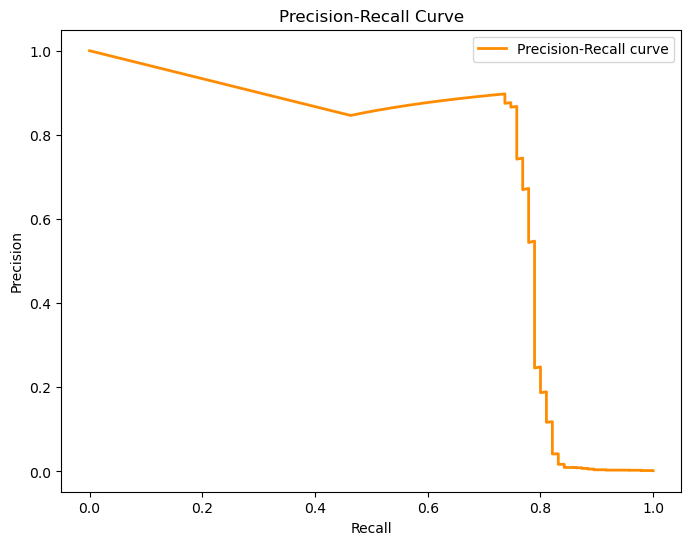

In [498]:
# Plot Precision-Recall curve
precision, recall, thresholds_pr = precision_recall_curve(y_test, y_pred_proba)

plt.plot(recall, precision, color='darkorange', lw=2, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="upper right")
plt.show()

In [606]:
y_pred_proba = model2.predict(X_test_scaled)
y_pred = (y_pred_proba >= 0.5).astype(int)

nn_f1 = f1_score(y_test, y_pred)
nn_acc = accuracy_score(y_test, y_pred)
nn_prec = precision_score(y_test, y_pred)
nn_recall = recall_score(y_test, y_pred)
nn_auc = roc_auc_score(y_test, y_pred)

1774/1774 [==============================] - 2s 1ms/step


### Neural Network with SMOTE

In [424]:
# Preprocessing steps  
scaler = StandardScaler()
over = SMOTE()
under = RandomUnderSampler()

# Pipeline  
pipeline = Pipeline([('scaler', scaler),
                     ('over', over),  
                     ('under', under)])
                     
# Fit preprocessing on training data
pipeline.fit(X_train, y_train) 

# Transform training data 
scaler.transform(X_train)

# Transform other splits
X_train_scaled = scaler.transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [425]:
model = Sequential()
model.add(Dense(128, input_dim=X_train_scaled.shape[1], activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))
model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(1, activation='sigmoid'))


***Compile Model***

In [426]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=tf.keras.metrics.Recall(name='recall'))

In [427]:
model.summary()

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_92 (Dense)            (None, 128)               3968      
                                                                 
 batch_normalization_66 (Bat  (None, 128)              512       
 chNormalization)                                                
                                                                 
 dropout_69 (Dropout)        (None, 128)               0         
                                                                 
 dense_93 (Dense)            (None, 64)                8256      
                                                                 
 batch_normalization_67 (Bat  (None, 64)               256       
 chNormalization)                                                
                                                                 
 dropout_70 (Dropout)        (None, 64)              

***Fit Model***

In [428]:
early_stop1 = EarlyStopping(monitor = "recall", mode = "max", verbose = 1, patience = 5,restore_best_weights=True)

In [429]:
model.fit(x=X_train_scaled, y=y_train, epochs=60, batch_size=64, validation_data=(X_val_scaled, y_val),callbacks = [early_stop1], verbose=1)

Epoch 1/60
2838/2838 [==============================] - 10s 3ms/step - loss: 0.0539 - recall: 0.5397 - val_loss: 0.0061 - val_recall: 0.8421
Epoch 2/60
2838/2838 [==============================] - 9s 3ms/step - loss: 0.0046 - recall: 0.6325 - val_loss: 0.0059 - val_recall: 0.8553
Epoch 3/60
2838/2838 [==============================] - 9s 3ms/step - loss: 0.0042 - recall: 0.6523 - val_loss: 0.0059 - val_recall: 0.8553
Epoch 4/60
2838/2838 [==============================] - 9s 3ms/step - loss: 0.0041 - recall: 0.6424 - val_loss: 0.0072 - val_recall: 0.8553
Epoch 5/60
2838/2838 [==============================] - 9s 3ms/step - loss: 0.0037 - recall: 0.6424 - val_loss: 0.0054 - val_recall: 0.8421
Epoch 6/60
2838/2838 [==============================] - 9s 3ms/step - loss: 0.0036 - recall: 0.6556 - val_loss: 0.0056 - val_recall: 0.8553
Epoch 7/60
2838/2838 [==============================] - 9s 3ms/step - loss: 0.0035 - recall: 0.6821 - val_loss: 0.0049 - val_recall: 0.8421
Epoch 8/60
2838/283

***Prediction and Model Evaluating***

In [430]:
loss_df = pd.DataFrame(model.history.history)
loss_df.tail()

,loss,recall,val_loss,val_recall
10,0.003,0.702,0.003,0.842
11,0.003,0.705,0.004,0.855
12,0.003,0.682,0.004,0.855
13,0.003,0.709,0.004,0.842
14,0.003,0.722,0.004,0.842


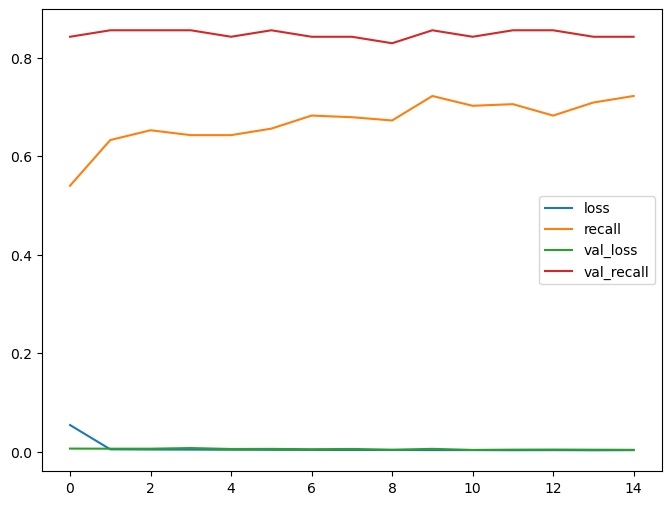

In [431]:
loss_df.plot()
plt.show()

In [432]:
# Evaluate the model on the test set
y_pred_proba = model.predict(X_test_scaled)
y_pred = (y_pred_proba >= 0.5).astype(int)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test, y_pred))

1774/1774 [==============================] - 2s 1ms/step
[[56640    11]
 [   22    73]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.87      0.77      0.82        95

    accuracy                           1.00     56746
   macro avg       0.93      0.88      0.91     56746
weighted avg       1.00      1.00      1.00     56746



In [433]:
y_pred_proba2 = model.predict(X_train_scaled)
y_pred2 = (y_pred_proba2 >= 0.5).astype(int)
print(confusion_matrix(y_train,y_pred2))
print(classification_report(y_train, y_pred2))

5675/5675 [==============================] - 6s 1ms/step
[[181224     58]
 [    51    251]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    181282
           1       0.81      0.83      0.82       302

    accuracy                           1.00    181584
   macro avg       0.91      0.92      0.91    181584
weighted avg       1.00      1.00      1.00    181584



***Plot Precision and Recall Curve***

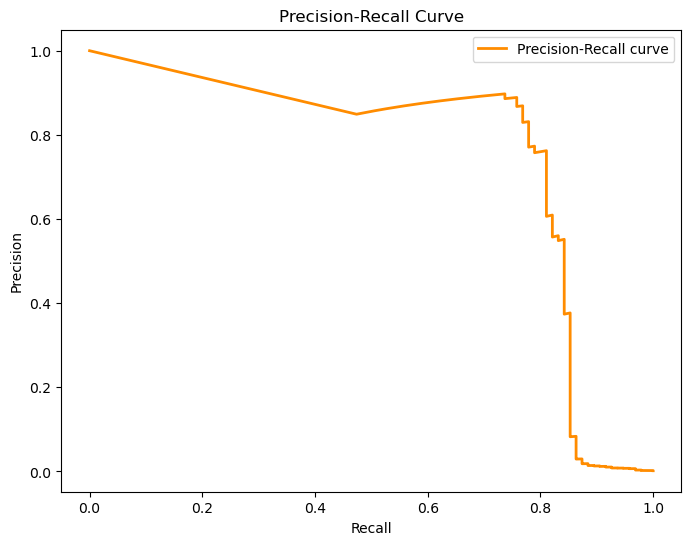

In [438]:
# Plot Precision-Recall curve
precision, recall, thresholds_pr = precision_recall_curve(y_test, y_pred_proba)

plt.plot(recall, precision, color='darkorange', lw=2, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="upper right")
plt.show()

***Apply Model Evaluation Checks for Neural Network without SMOTE***
* link : https://docs.deepchecks.com/stable/user-guide/tabular/auto_quickstarts/plot_quick_model_evaluation.html

In [499]:
from deepchecks.tabular import Dataset
train_ds = Dataset(X_train, label=y_train, cat_features=[])
test_ds = Dataset(X_test, label=y_test, cat_features=[])

In [500]:
from deepchecks.tabular.suites import model_evaluation

evaluation_suite = model_evaluation()
suite_result = evaluation_suite.run(train_ds, test_ds, model2)
# Note: the result can be saved as html using suite_result.save_as_html()
# or exported to json using suite_result.to_json()
suite_result.show()

1774/1774 [==============================] - 2s 964us/step


1/1 [==============================] - 0s 24ms/step


deepchecks - WARNING - Could not find built-in feature importance on the model, using permutation feature importance calculation instead


313/313 [==============================] - 0s 951us/step


deepchecks - WARNING - Features importance was not calculated:
Skipping permutation importance calculation: calculation was projected to finish in 444 seconds, but timeout was configured to 120 seconds


32/32 [==============================] - 0s 1ms/step


Accordion(children=(VBox(children=(HTML(value='\n<h1 id="summary_RWU4SCF57F0DJM60KGY4H0YAX">Model Evaluation S…

## Model Comparison

In [607]:
compare = pd.DataFrame({
    "Model": ["LG Simple", "LG with CW", "LG with SMOTE", "RF with Imp feat", "XGB with smote and imp feat", "XGB with CW and imp feat", "Deep_Learning"],
    "f1_score": [lg_f1, ulg_class_w_f1, lg_s_f1, rf_fi_f1, xgb_smote_fi_f1, xgb_cw_fi_f1, nn_f1],
    "accuracy": [lg_acc, ulg_class_w_acc, lg_s_acc, rf_fi_acc, xgb_smote_fi_acc, xgb_cw_fi_acc, nn_acc],
    "precision": [lg_prec, ulg_class_w_prec, lg_s_prec, rf_fi_prec, xgb_smote_fi_prec, xgb_cw_fi_prec, nn_prec],
    "recall": [lg_recall, ulg_class_w_recall, lg_s_recall, rf_fi_recall, xgb_smote_fi_recall, xgb_cw_fi_recall, nn_recall],
    "roc_auc": [lg_auc, ulg_class_w_auc, lg_s_auc, rf_fi_auc, xgb_smote_fi_auc, xgb_cw_fi_auc, nn_auc]
})

compare

,Model,f1_score,accuracy,precision,recall,roc_auc
0,LG Simple,0.110,0.976,0.059,0.874,0.925
1,LG with CW,0.805,0.999,0.886,0.737,0.868
2,LG with SMOTE,0.111,0.978,0.059,0.878,0.928
3,RF with Imp feat,0.787,0.999,0.818,0.758,0.879
4,XGB with smote and imp feat,0.203,0.989,0.116,0.821,0.905
5,XGB with CW and imp feat,0.757,0.999,0.865,0.674,0.837
6,Deep_Learning,0.800,0.999,0.847,0.758,0.879


In [619]:
compare.iloc[1,:]

Model        LG with CW
f1_score          0.805
accuracy          0.999
precision         0.886
recall            0.737
roc_auc           0.868
Name: 1, dtype: object

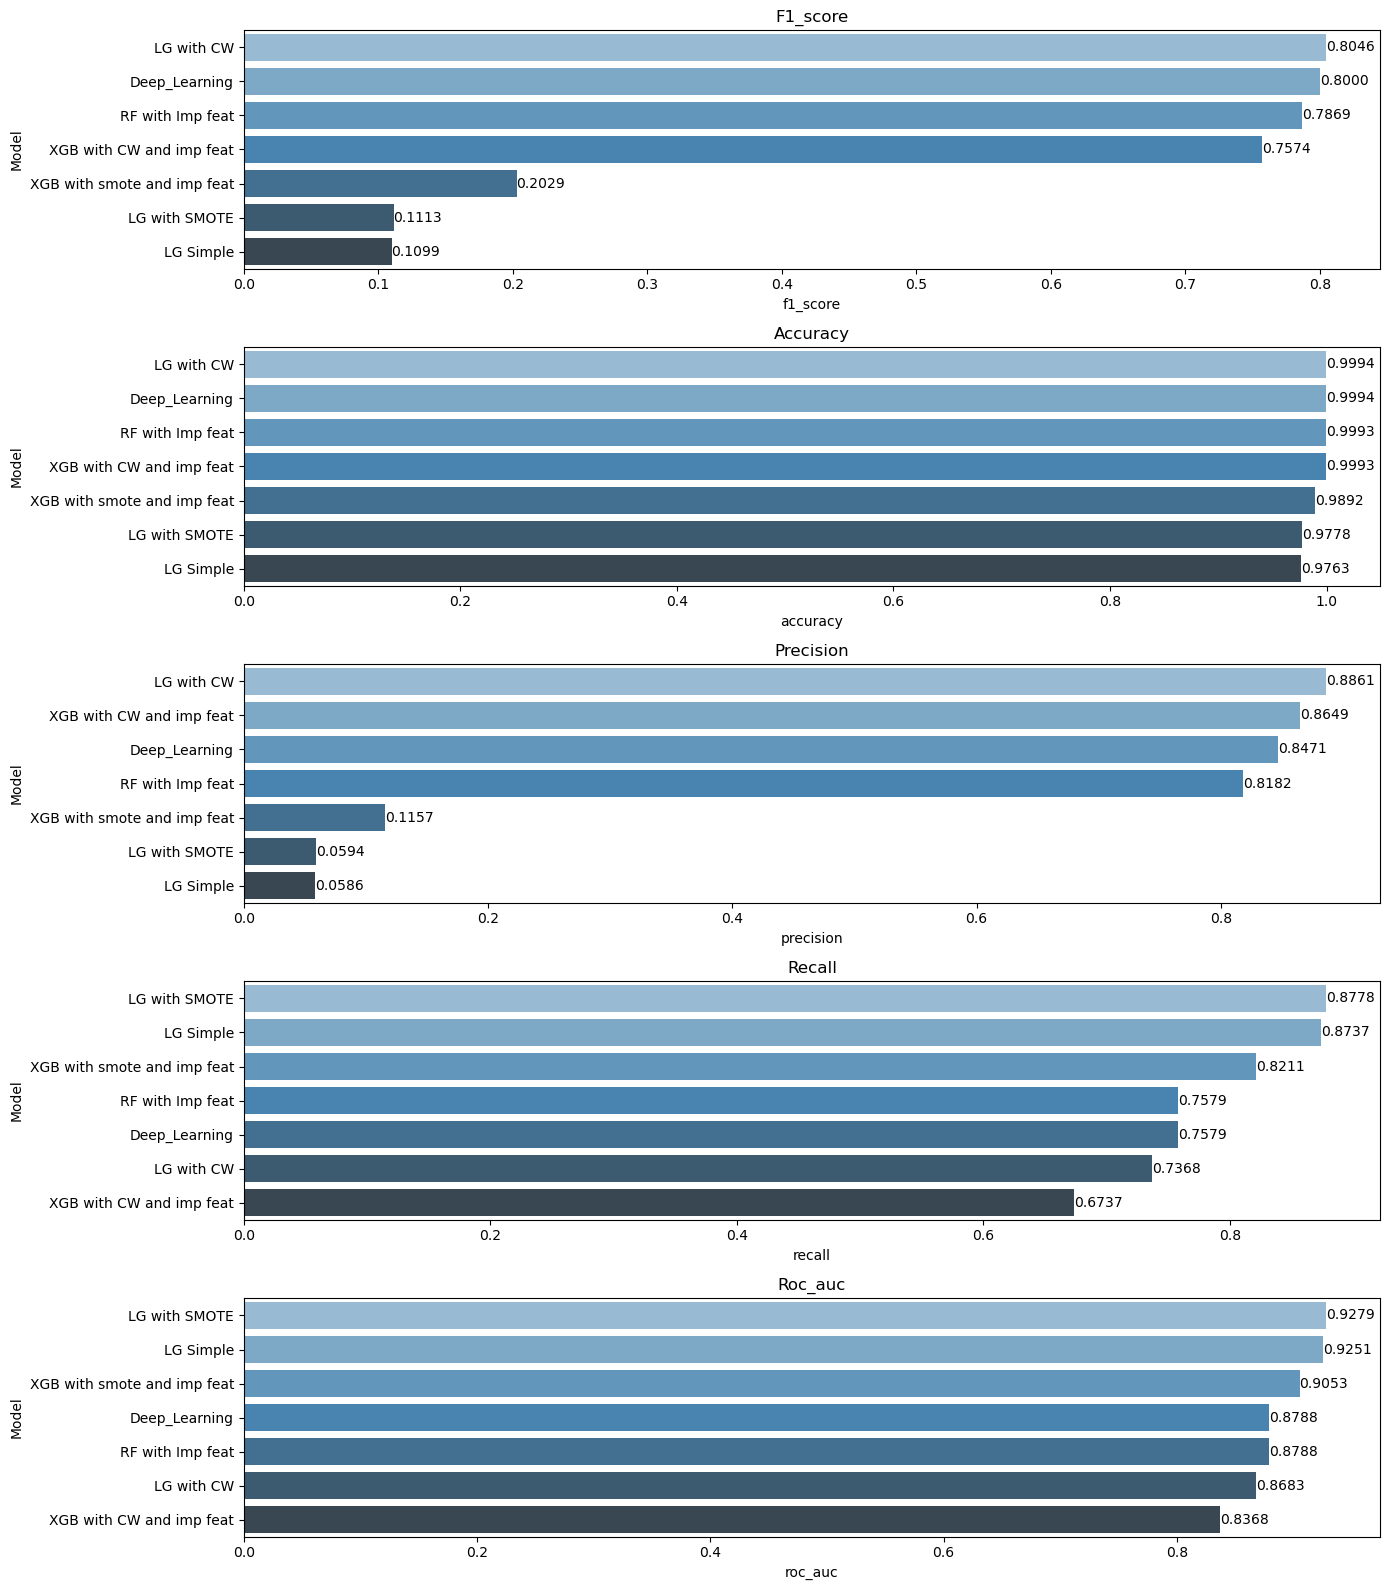

In [608]:
# Set up the subplots
fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(14, 16))

# Metrics to plot
metrics = ["f1_score", "accuracy", "precision", "recall", "roc_auc"]

for i, metric in enumerate(metrics):
    # Sort the DataFrame by the current metric in descending order
    compare_metric = compare.sort_values(by=metric, ascending=False)
    
    # Create a bar plot for the current metric
    ax = sns.barplot(x=metric, y="Model", data=compare_metric, palette="Blues_d", ax=axes[i])
    
    # Add labels to each bar in the plot
    for container in ax.containers:
        ax.bar_label(container, fmt="%.4f", label_type='edge', fontsize=10)  # Use 'edge' for outside labels
    
    # Set title for the subplot
    axes[i].set_title(metric.capitalize())

# Adjust layout
plt.tight_layout()
plt.show()

Based on the metrics, the best model for this fraud detection problem would be:

**Model 1 (LG with CW)**:

It has the highest F1 score of 0.805, indicating the best balance of precision and recall. For a fraud detection problem, we want a model that can accurately identify both fraudulent and non-fraudulent cases.
Recall is also good at 0.737. We want high recall to minimize missing any actual fraud cases.
Precision of 0.886 is also the highest, showing most of the predicted positives are actually positive.
Accuracy and AUC are also very good.
Some reasons to choose this model over others:

+ Models LG Simple, LG with SMOTE have very low F1 scores indicating poor balance of precision and recall.
+ Models 'XGB with smote and imp feat', 'XGB with CW and imp feat	' have lower F1 and precision scores. We want high precision to have confidence in detected fraud cases.
+ Models 'RF with Imp feat', 'Deep Learning' have similar metrics but Model 1 has a slight edge in F1 and precision.
+ In summary, Logistic Regression with class weights provides the best balance of high precision, recall and F1 score needed for an accurate fraud detection model based on the evaluation metrics. The class weighting helps address any imbalance in the data.

##  Model Deployement
You cooked the food in the kitchen and moved on to the serving stage. The question is how do you showcase your work to others? Model Deployement helps you showcase your work to the world and make better decisions with it. But, deploying a model can get a little tricky at times. Before deploying the model, many things such as data storage, preprocessing, model building and monitoring need to be studied.

Deployment of machine learning models, means making your models available to your other business systems. By deploying models, other systems can send data to them and get their predictions, which are in turn populated back into the company systems. Through machine learning model deployment, can begin to take full advantage of the model you built.

Data science is concerned with how to build machine learning models, which algorithm is more predictive, how to design features, and what variables to use to make the models more accurate. However, how these models are actually used is often neglected. And yet this is the most important step in the machine learning pipline. Only when a model is fully integrated with the business systems, real values ​​can be extract from its predictions.

After doing the following operations in this notebook, jump to a proper IDE and create your web app with Streamlit API.

### Save and Export the Best Model


In [621]:
from sklearn.pipeline import Pipeline

In [622]:
X = df.drop('Class', axis=1)
y = df['Class']

In [623]:
class_weight_factor =  0.2568938156037596
class_weights = {0: 0.50084511, 1: 10}
class_weights_w = {0: class_weights[0], 1: class_weights[1] * class_weight_factor}

In [624]:
best_params_lgw = {'penalty': 'l2', 'solver': 'liblinear', 'C': 0.001491251537062207}

In [625]:
operations = [("scaler", scaler),
              ("log", LogisticRegression(random_state=42, **best_params_lgw,max_iter=250,
                                         class_weight=class_weights_w))]

pipeline = Pipeline(operations)
final_model = pipeline.fit(X,y)
final_model.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('log',
                 LogisticRegression(C=0.001491251537062207,
                                    class_weight={0: 0.50084511,
                                                  1: 2.5689381560375963},
                                    max_iter=250, random_state=42,
                                    solver='liblinear'))])

In [626]:
eval_metric(final_model, X_train, y_train, X_test, y_test)

Test_Set
[[56643     8]
 [   25    70]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.90      0.74      0.81        95

    accuracy                           1.00     56746
   macro avg       0.95      0.87      0.90     56746
weighted avg       1.00      1.00      1.00     56746


Train_Set
[[181245     37]
 [    70    232]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    181282
           1       0.86      0.77      0.81       302

    accuracy                           1.00    181584
   macro avg       0.93      0.88      0.91    181584
weighted avg       1.00      1.00      1.00    181584



### Save and Export Variables

In [627]:
import joblib

In [628]:
# Save the model
joblib.dump(final_model, 'final_model.joblib')

['final_model.joblib']

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___